#**Understanding Optimal Bike Sharing Conditions**

I had previously written a paper where I used a 2011 and 2012 bike sharing dataset and my data science skills to figure out what conditions were optimal for bike sharing. Below I've put together my coding and my research/conclusions.

##**Introduction**

Bike sharing is an increasingly popular form of transportation in major metropolitan cities in Europe and America. It is a system where people can rent bikes, both on an hourly and daily basis, from locations across the city and drop the bikes off at another recognized location. It has become increasingly popular because it is a cheap, environmentally safe, and efficient mode of transportation. The low cost, environmental cleanliness, easy of access, and ability to go through narrow spaces have made it popular in developing countries.

The intention is to understand the relationship between number of bikes rented and conditions such as humidity, temperature, wind, and the time of the year.

##**Description of the Data**

### **Brief Overview of Data**

Dataset: https://www.kaggle.com/datasets/imakash3011/rental-bike-sharing

The Kaggle dataset is comprised of 2 data tables that track how many bikes are rented on a daily basis and an hourly basis. The datasets track the number of bikes rented from DC from the Capital Bike Share system during the years of 2011 and 2012. It also tracks a variety of other information like weather conditions and information about the day itself. The variables are listed below:

 1. instant: The index.
    
 2.   dteday: The date.
    
 3.   season: The season represented as a value from 1-4. 1 Being winter, 4 being fall.
    
 4.   yr: The year, 0 for 2011, 1 for 2012.
    
 5.   mnth: The month represented as a value from 1-12.
    
 6.   hr: The hour from 0-23. Only in the hourly data table.
    
 7.   holiday: 0 if it wasn’t a holiday, 1 if it was a holiday.
    
 8.   weekday: Day of the week represented as a value from 0-6. 0 is Sunday, 6 is Saturday
    
 9.   workingday: Value is 1 if it isn't a weekend or holiday, 0 if it is.
    
 10.   weathersit: Values from 1-4, with lower numbers representing nicer weather and higher numbers signaling worse weather.
    
 11.   temp: Normalized temperature in Celsius.
    
 12.   atemp: Normalized feeling temperature in Celsius.
    
 13.   hum: Normalized humidity.
    
 14.   windspeed: Normalized wind speed.
    
 15.   casual: Number of casual users.
    
 16.   registered: Count of registered users.
    
 17.   cnt: Count of total rented bikes including casual and registered.

### **Data to be Used**

The hourly data table doesn't have values for all of the entries in the windspeed column so the daily data table will be used for the analysis. For the creation of the model, the following variables will be used:
 1. Independent Variables: season, yr, mnth, holiday, weekday, weathersit, atemp, hum, and windspeed.
  - Instant won't be used given that it is just an indexing variable and wouldn't affect the dependent variable.
  - The information covered by dteday is also covered by the year and month variables so dteday is a bit redundant.
  - While season and month have a high correlation coefficient of 0.83, they will still be used because there are months where a transition of the seasons occurs.
  - Hour isn't used because the daily data table will be used.
  - The information covered by workingday is also covered by the holiday and weekday variables, so workingday is redundant.
  - Temp and atemp essentially measure the same thing and have a Pearson correlation coefficient of 0.99. A correlation so high indicates they are essentially the same data, this project will use atemp(feeling temperature) because people base their outdoor activities based on the temperature they feel rather than the actual temperature.

In [ ]:
pearsonr(day['atemp'].values, day['temp'].values)

PearsonRResult(statistic=0.9917015532294639, pvalue=0.0)

 2. Dependent Variable: cnt.
	 - The cnt variable is chosen as the dependent variable because the model will be looking to map the total number of bikes rented.

### **Pre-processing**

The dependent variable, cnt, has values ranging from 0-8000 so for all calculations, plots, and models the dependent variable will be log transformed to make it more normally distributed. The correlation coefficient calculations are done with a non-log transformed dependent variable though.

###**Independent and Dependent Variable Relationships**

####**Correlation Coefficient**

Below is the table with the correlation coefficient between the dependent variable, the total number of bikes rented, and each independent variable. The hour variable correlation was also put there just for more information on significant factors.

|Independent Variable|Correlation Coefficient|
|--|--|
|Hour|0.39|
|Season|0.41|
|Year|0.57|
|Month|0.28|
|Holiday|-0.07|
|Weekday|0.07|
|Weather Situation|-0.30|
|Feeling Temperature|0.63|
|Humidity|-0.10|
|Windspeed|-0.23|

In [ ]:
pearsonr(hour['hr'].values, hour['cnt'].values)

PearsonRResult(statistic=0.39407149778294304, pvalue=0.0)

#####**Findings**

1.   The total number of bikes rented is most correlated with the feeling temperature which is logical since people's willingness to go outdoors is highly dependent on warmer temperatures.
2.   Year, month, and season all have a positive correlation with bikes rented. It makes sense since the bike-share program grows yearly. Since month and season start in winter with low bike rentals and bike rentals go up over the year, it's logical that there is a moderate positive correlation between bikes rented and month/season.
3.  Holiday has a light negative correlation which is due to its categorical nature and the fact holidays are scattered over the year including many in winter and fall.
4.  Weekday is also loosely correlated, probably due to the categorical nature of the variable.
5.  Weather situation being negatively correlated isn't surprising since poor weather conditions aren't optimal for bike rentals.
6.  Humidity and windspeed were slightly negatively correlated with the total number of bikes rented. This makes sense because too high humidity or windspeed likely disincentivizes outdoor biking.

####**Local Trends**

Many of the categorical variables created unclear graphs when plotted against bikes rented. In order to make clear visualizations, bar graphs were made using these categorical variables and the average bikes rented. Numerical values were still plotted on a scatterplot against the number of bikes rented for continuous variables.

#####**Time Based Factors**

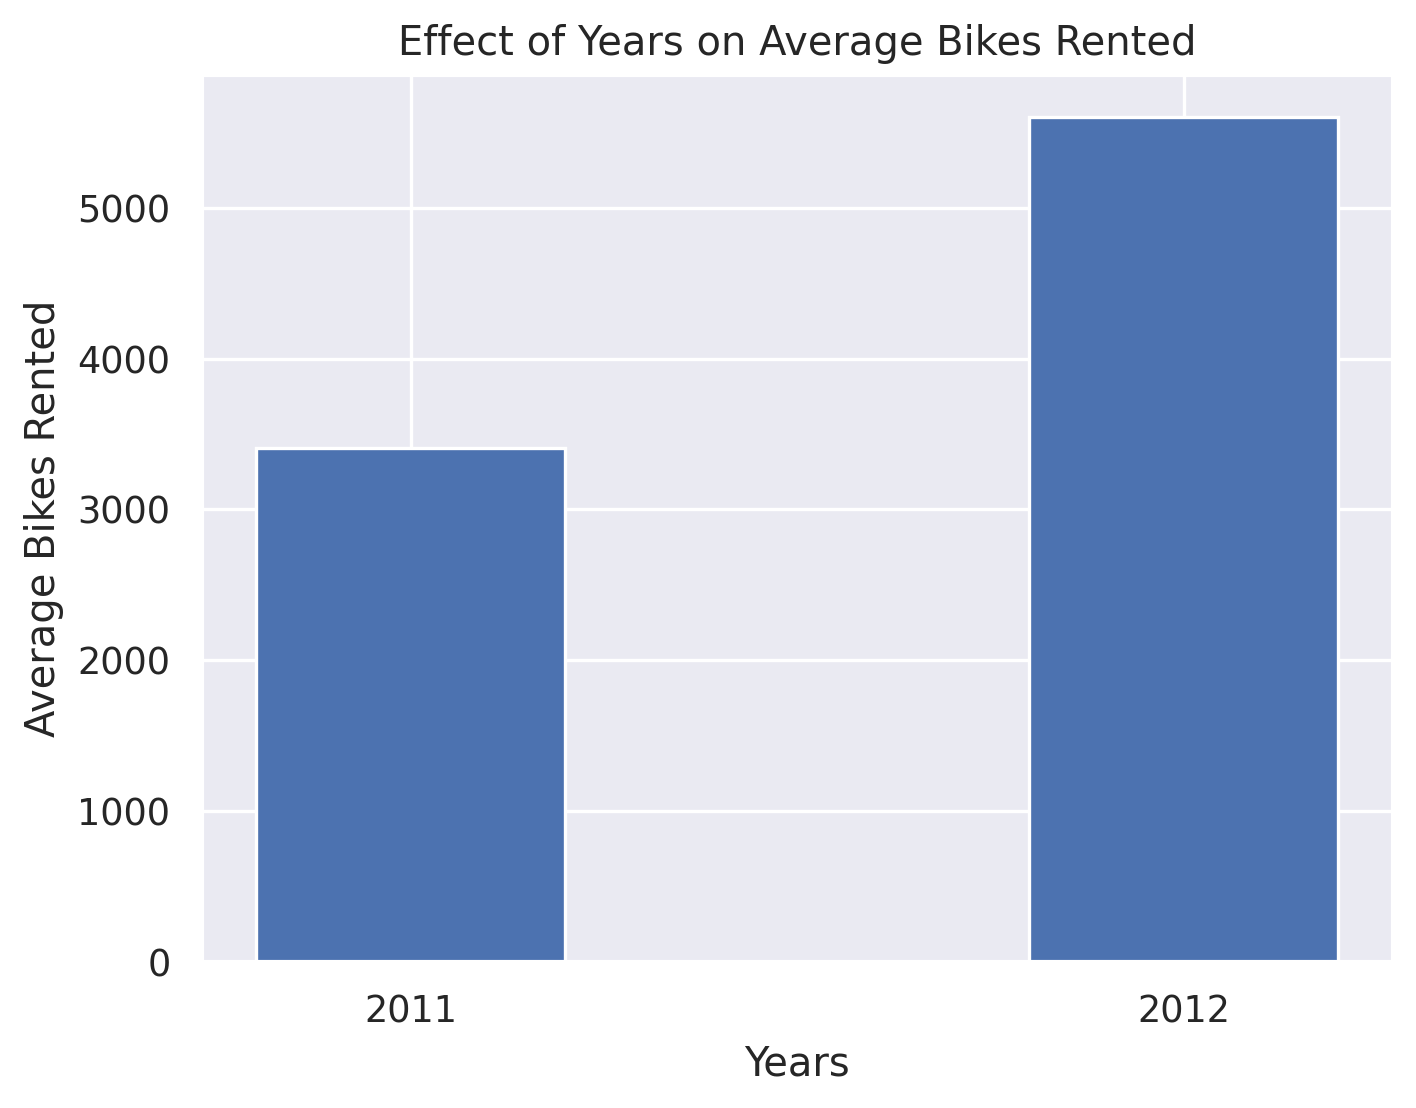

In [ ]:
#Plotting years against average bikes rented.
plt.bar(arr_yrx, arr_yry, width = 0.4)
plt.xlabel("Years")
plt.ylabel("Average Bikes Rented")
plt.title("Effect of Years on Average Bikes Rented")
plt.show()

The average bikes rented each year went up from 2011 to 2012. A logical progression considering the expansion of bike share programs over time.

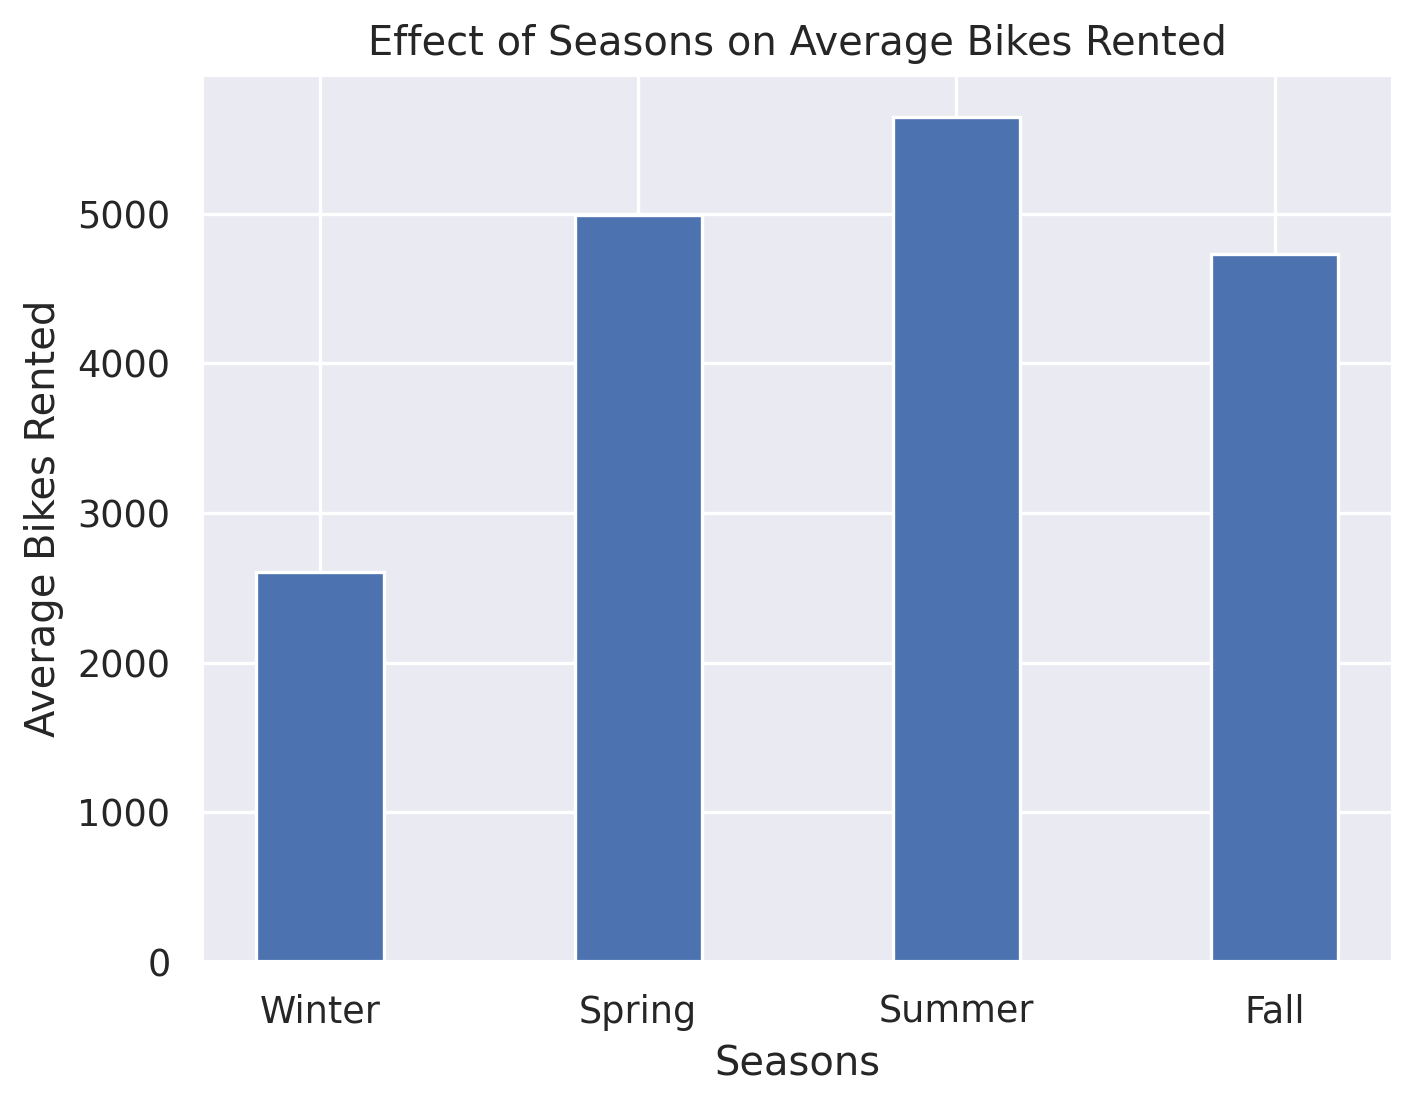

In [ ]:
#Plotting seasons against average bikes rented.
plt.bar(arr_seasonx, arr_seasony, width = 0.4)
plt.xlabel("Seasons")
plt.ylabel("Average Bikes Rented")
plt.title("Effect of Seasons on Average Bikes Rented")
plt.show()

The trend for bike rentals over seasons show that summer followed by spring, fall, and finally winter have the most bikes rented. Warmer, sunnier weather is conducive for more outdoor activities like biking as the weather situation and temperature plots will show.

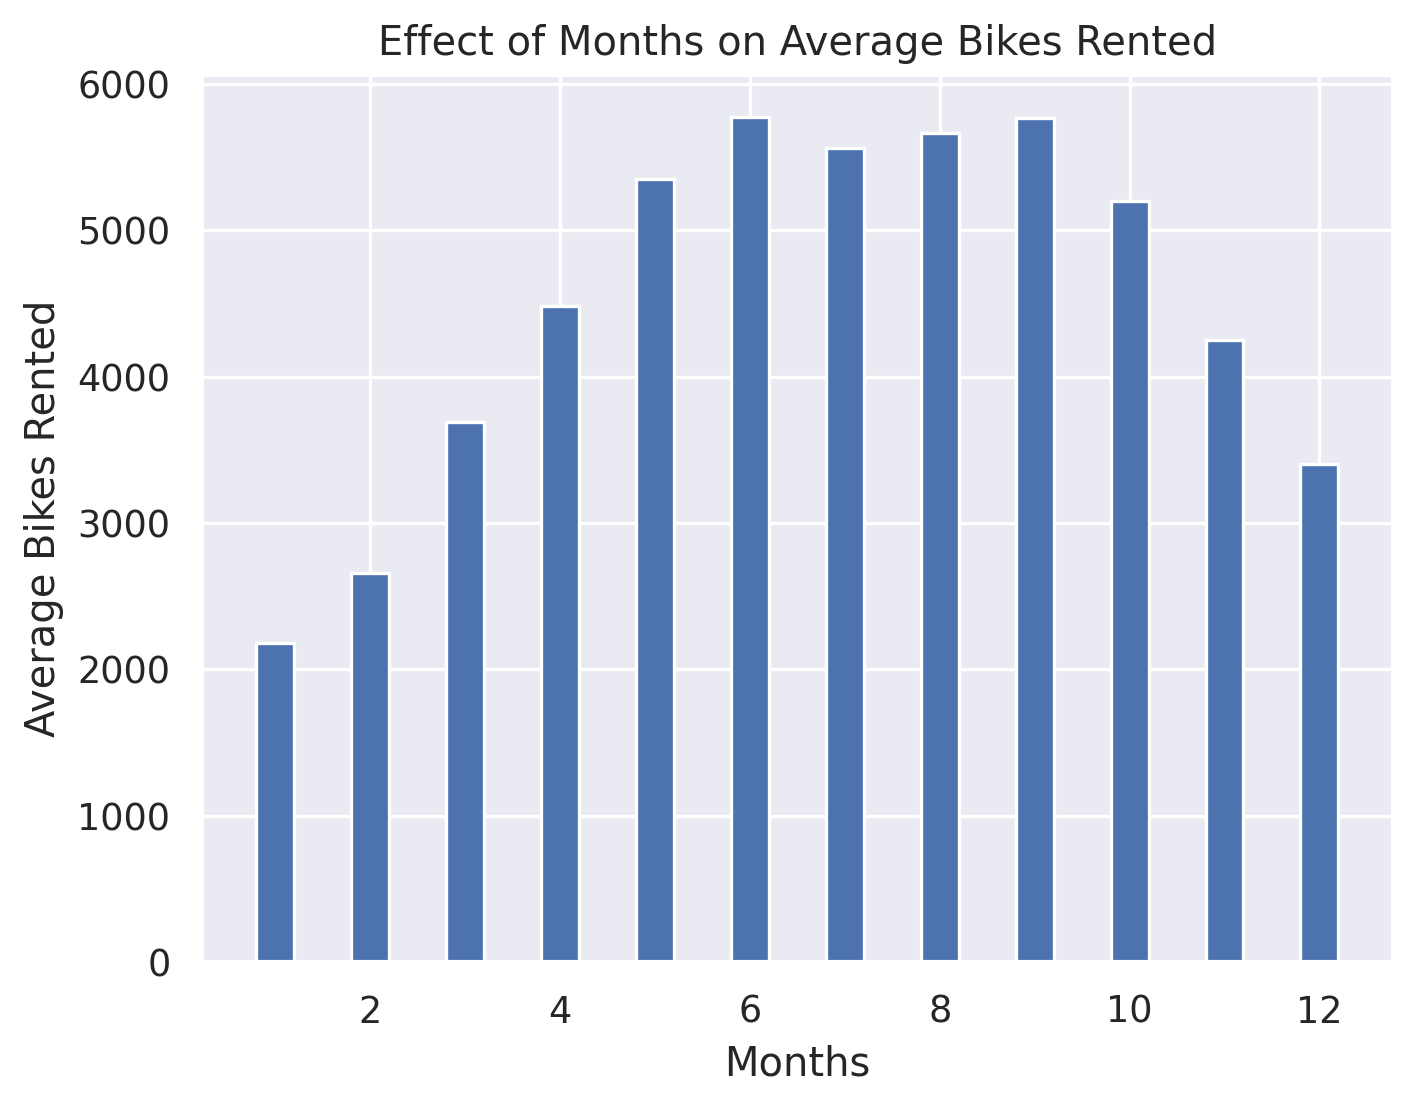

In [ ]:
#Plotting months against average bikes rented.
plt.bar(arr_mnthx, arr_mnthy, width = 0.4)
plt.xlabel("Months")
plt.ylabel("Average Bikes Rented")
plt.title("Effect of Months on Average Bikes Rented")
plt.show()

The findings of the month graph are in line with the findings of the season graphs with summer months having the most bikes rented and winter months having the least bikes rented. June and September have the most bikes rented on average, likely due to the fact that they are still sunny summer months but have less of an oppressive heat then July or August.

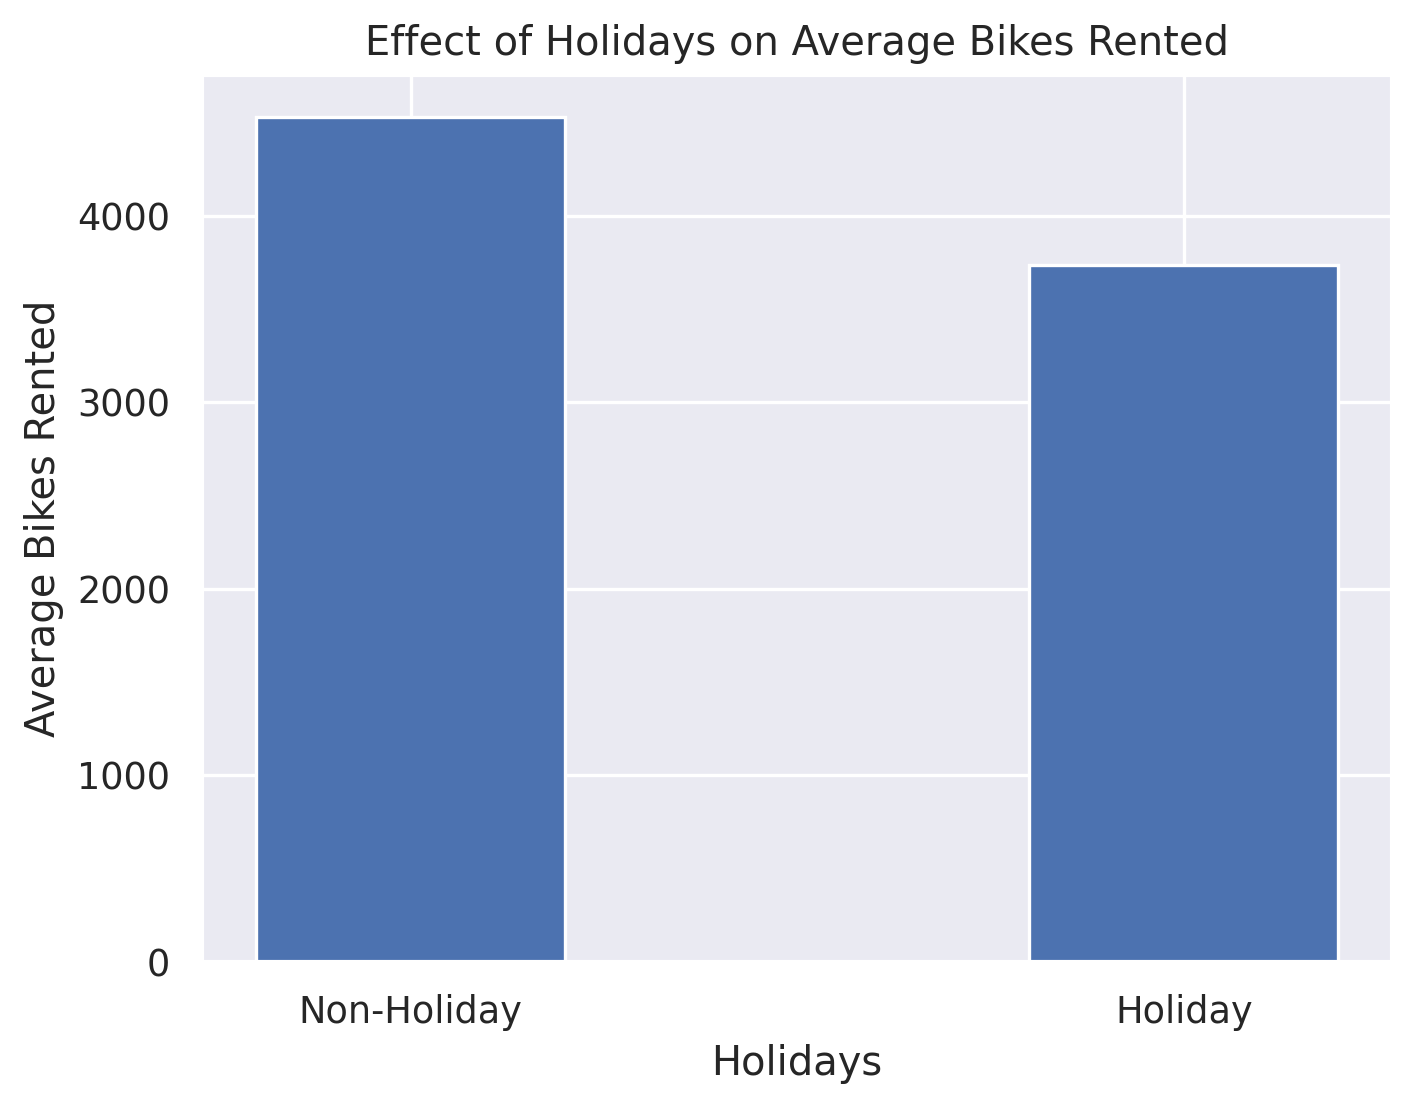

In [ ]:
#Plotting the presence of a holiday against average bikes rented.
plt.bar(arr_holidayx, arr_holidayy, width = 0.4)
plt.xlabel("Holidays")
plt.ylabel("Average Bikes Rented")
plt.title("Effect of Holidays on Average Bikes Rented")
plt.show()

Initially, it seems odd that holidays have lower average bike rentals than non-holidays but after realizing that many holidays take place over the winter this trend becomes far more logical.

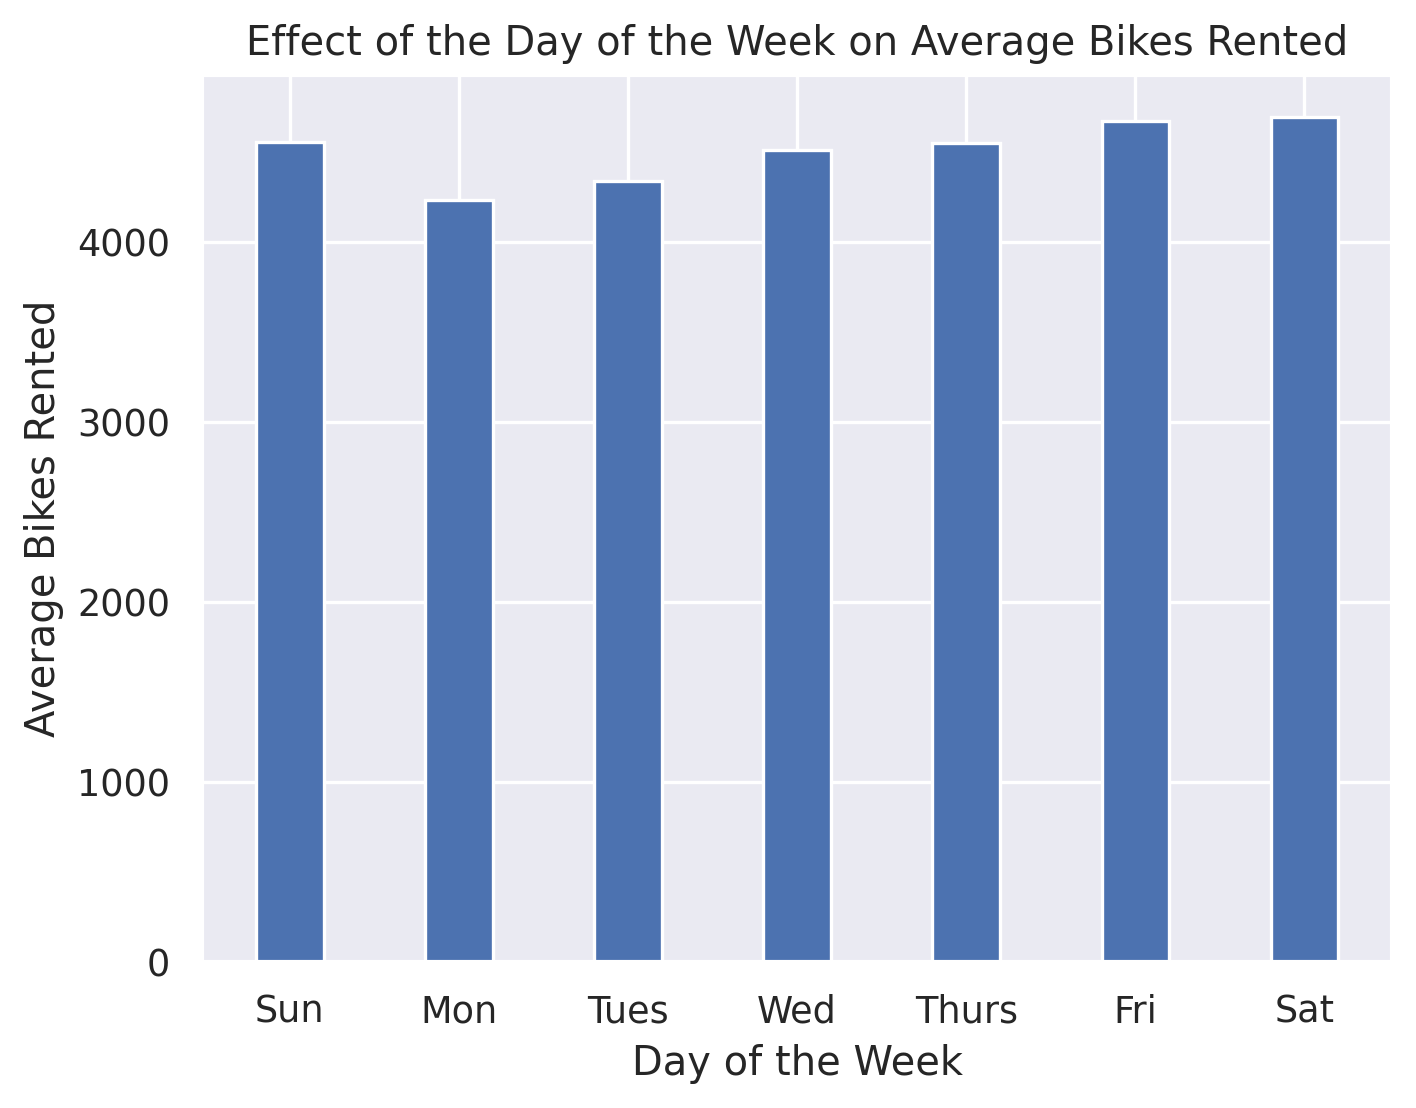

In [ ]:
#Plotting the days of the week against average bikes rented.
plt.bar(arr_weekdayx, arr_weekdayy, width = 0.4)
plt.xlabel("Day of the Week")
plt.ylabel("Average Bikes Rented")
plt.title("Effect of the Day of the Week on Average Bikes Rented")
plt.show()

The local trend for the day of the week behaved as expected with the weekend(Friday, Saturday, Sunday) being more popular for bike rentals than weekdays.

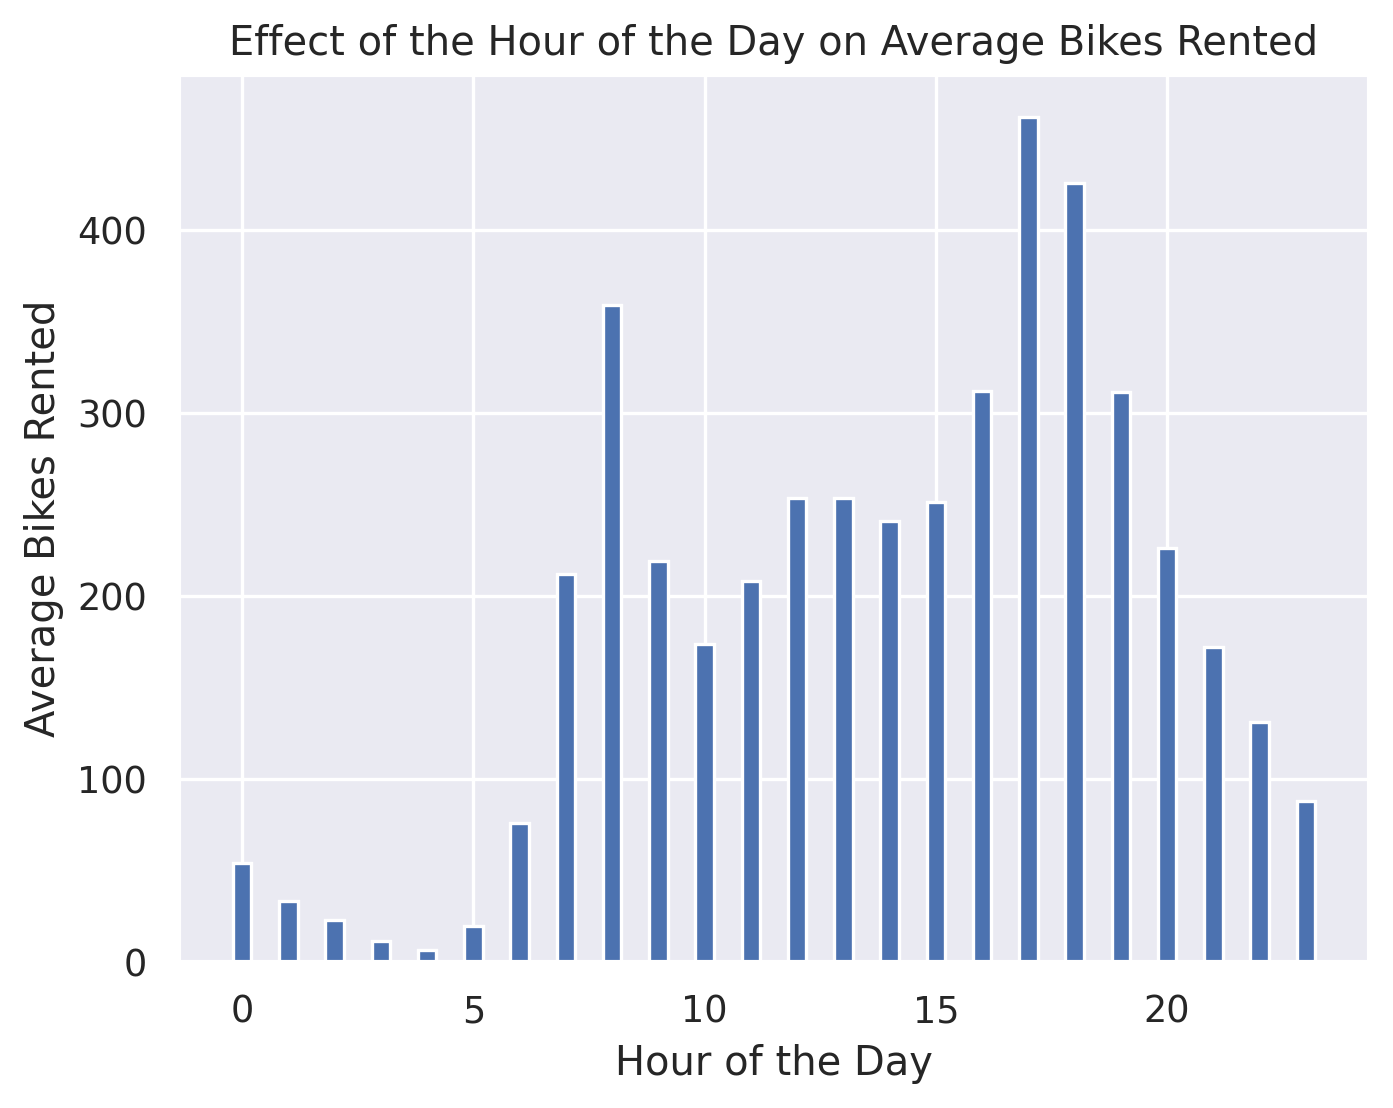

In [ ]:
#Plotting the hour of the day against average bikes rented.
plt.bar(arr_hrx, arr_hry, width = 0.4)
plt.xlabel("Hour of the Day")
plt.ylabel("Average Bikes Rented")
plt.title("Effect of the Hour of the Day on Average Bikes Rented")
plt.show()

The local trends show that bikes are rented increasingly more throughout the day until the peak of 5pm with a local peak at 8am.

#####**Weather Based Factors**

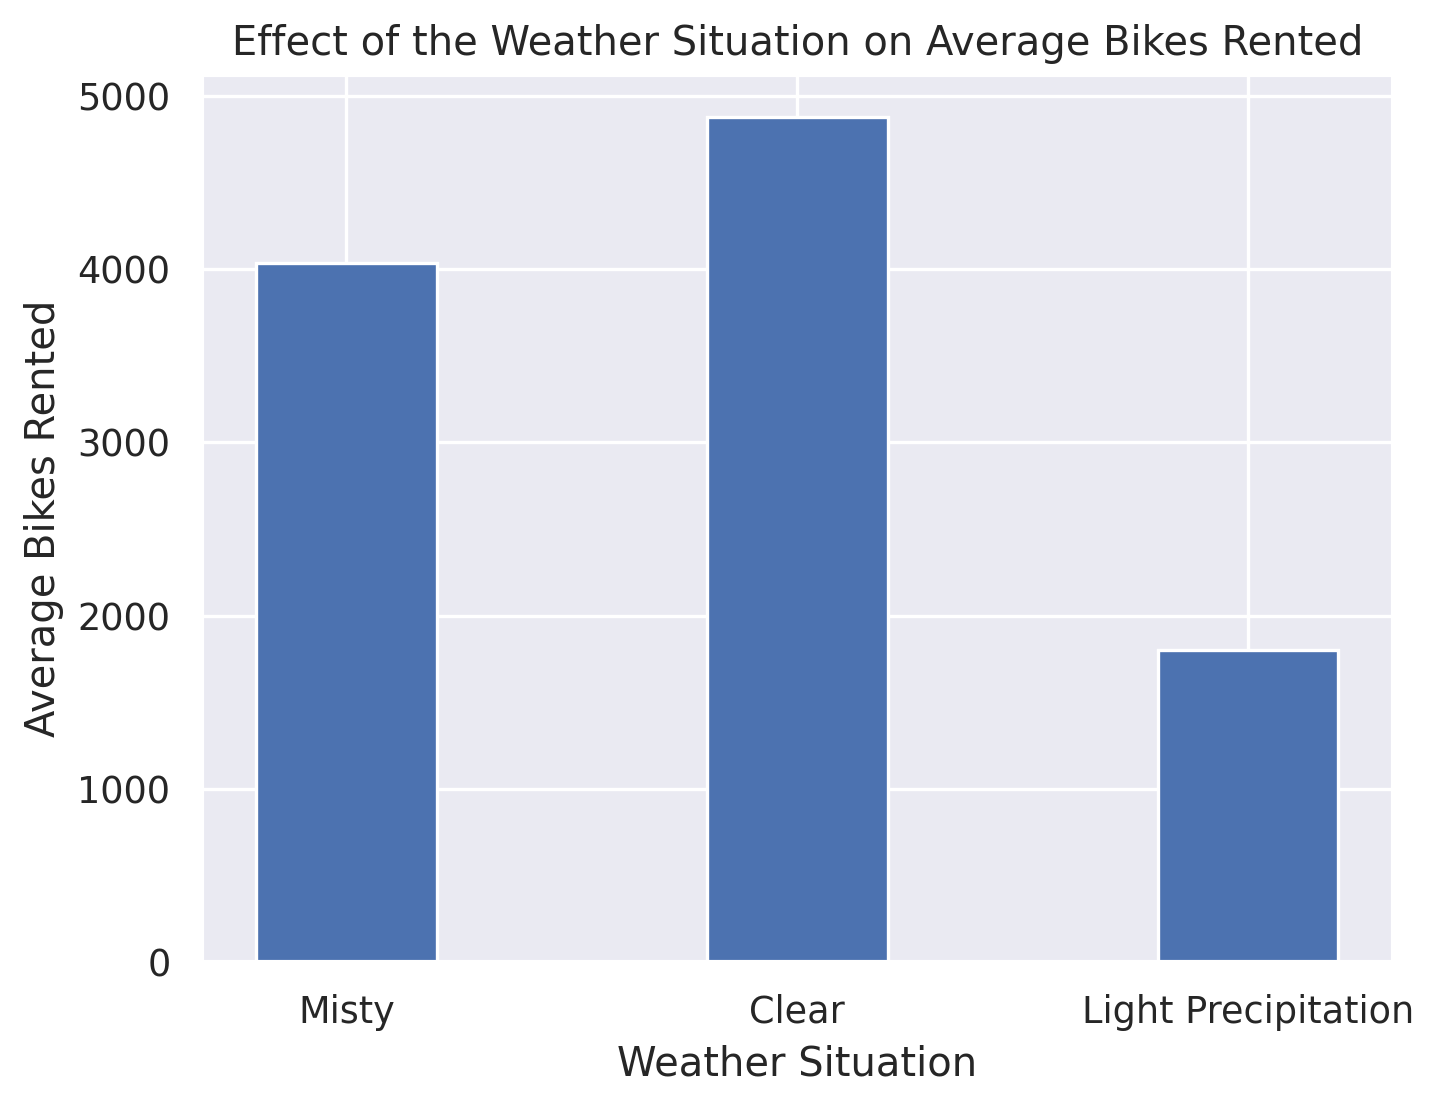

In [ ]:
#Plotting the weather situation against average bikes rented.
plt.bar(arr_weathersitx, arr_weathersity, width = 0.4)
plt.xlabel("Weather Situation")
plt.ylabel("Average Bikes Rented")
plt.title("Effect of the Weather Situation on Average Bikes Rented")
plt.show()

The weather situation bar graph shows that the average bike rentals increase when there is clear weather and decreases when there is poorer conditions like low visibility or precipitation.

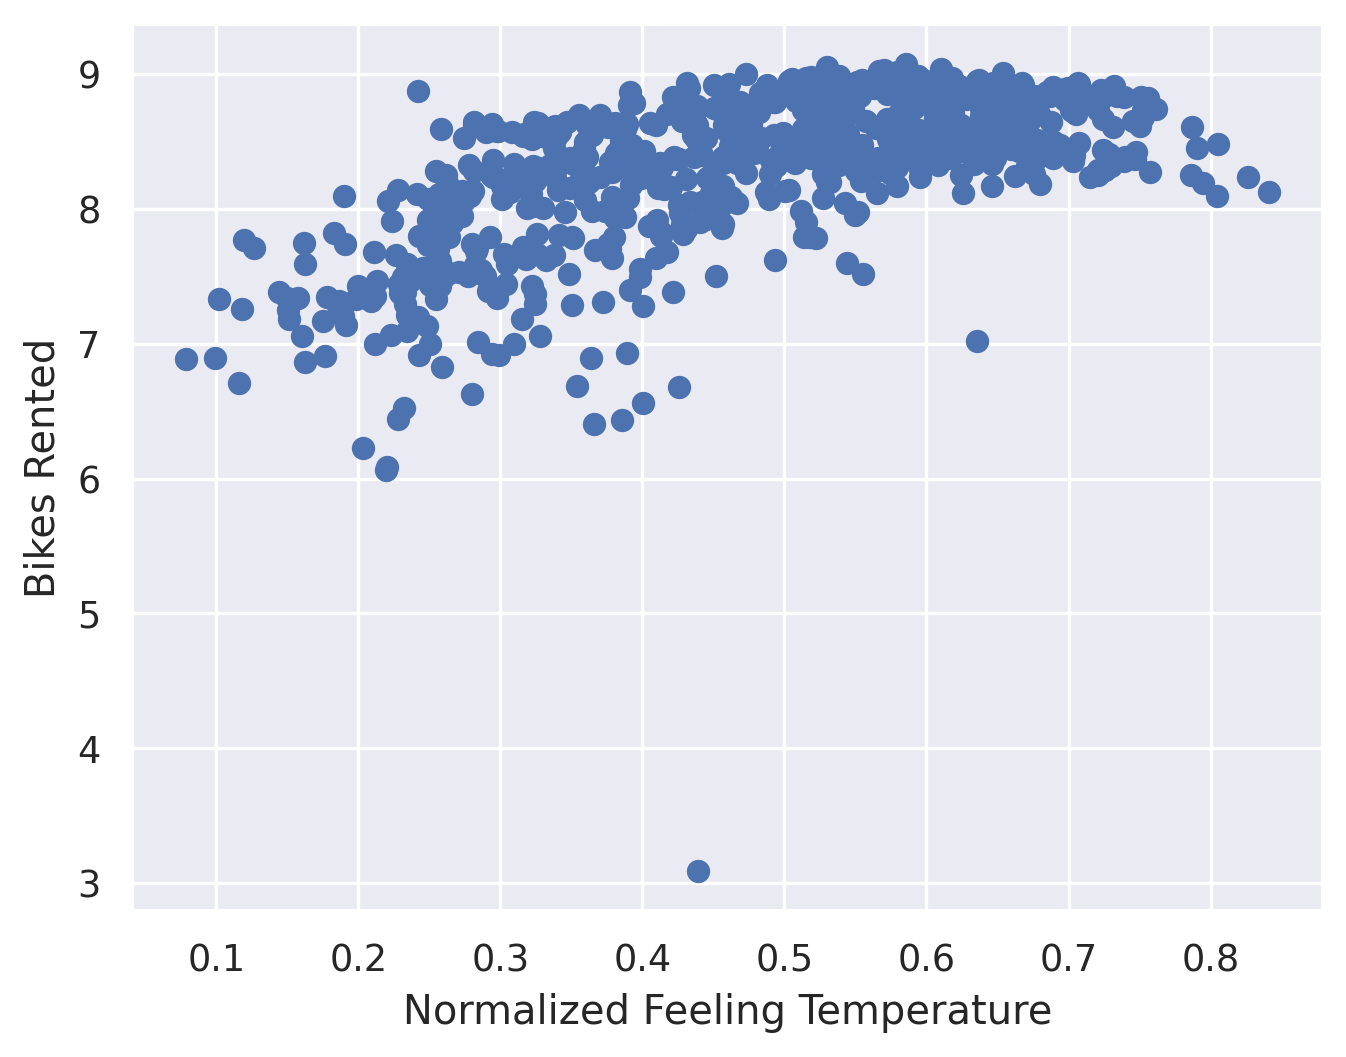

In [ ]:
#Relationship of the feeling temperature with the bikes rented.
plt.scatter(day['atemp'].values, y)
plt.xlabel("Normalized Feeling Temperature")
plt.ylabel("Bikes Rented")
plt.show()

The normalized feeling temperature graph shows how lower temperatures have lower bike rentals and that at the highest temperatures there is also a slight drop off in bike rentals. This indicates that there are both too cold and hot temperatures for frequent bike riding. There is a steeper drop off at lower temperatures.

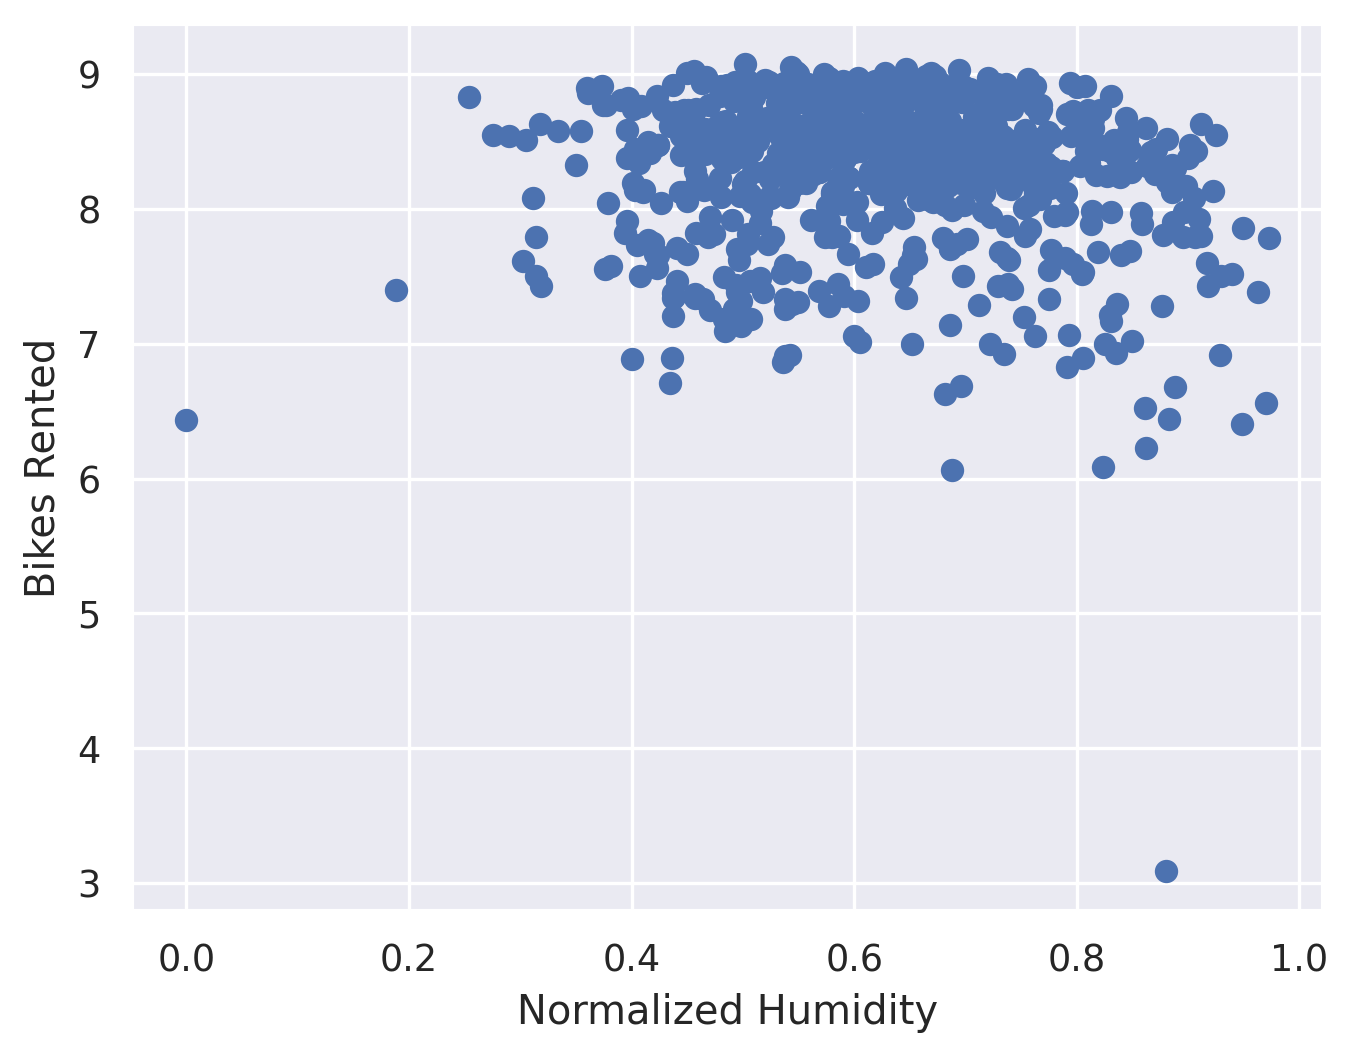

In [ ]:
#Relationship between humidity and bikes rented.
plt.scatter(day['hum'].values, y)
plt.xlabel("Normalized Humidity")
plt.ylabel("Bikes Rented")
plt.show()

The normalized humidity graph shows that too low and too high humidity have a drop off in bike rentals but a more extreme drop off in bike rentals seen with high humidity.

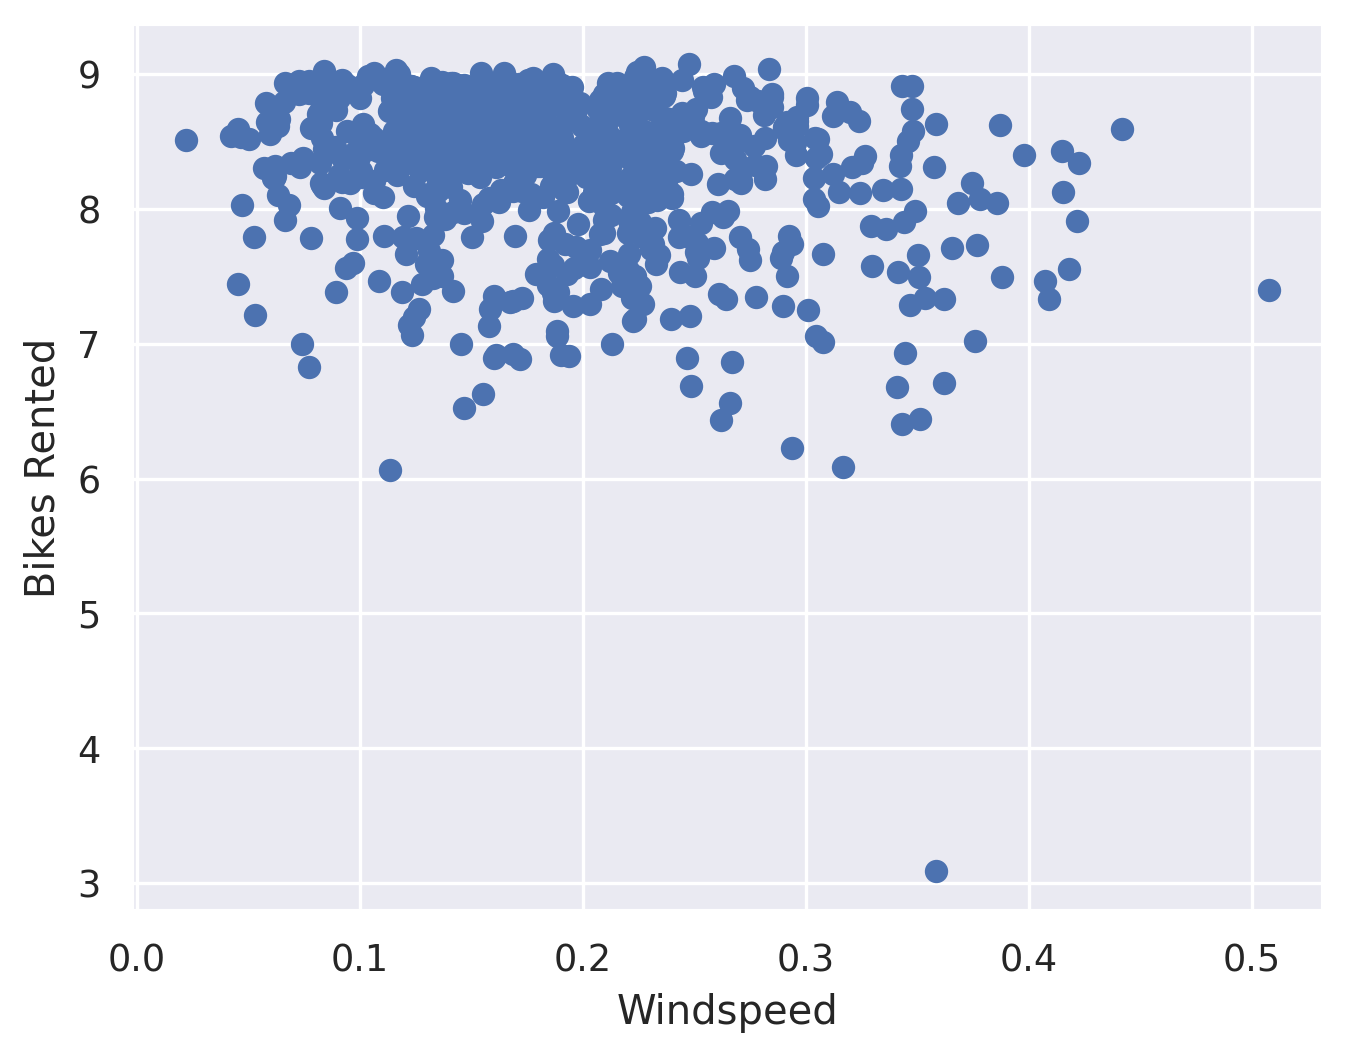

In [ ]:
#Relationship between windspeed and bikes rented.
plt.scatter(day['windspeed'].values, y)
plt.xlabel("Windspeed")
plt.ylabel("Bikes Rented")
plt.show()

The windspeed chart yet again shows a similar relationship to the other atmospheric conditions. There is a drop of in bike rentals with low and high windspeeds with a greater drop with high windspeeds.

##Conclusion

The initial findings for how correlated some factors were to the usage of the bike rental system showed that temperature and year were the most correlated while holidays and weekdays were the least correlated. This initially didn't reveal too much without looking at the individual local trends. Though temperature being the most correlated isn't too suprising given that outdoor activities like bicycling are governed by temperature.

The local trends for time based variable, for the most part, showed expected conclusions:

*   The average number of bikes rented went up from 2011 to 2012 as the bike sharing program became more popular
*   Warm months and seasons(summer and spring) were more popular for bike sharing than colder months and seasons(winter and fall).
*   Weekends were more popular than weekdays.
*   The most popular hours bikes were rented were day time hours close-ish to sunrise and sunset.

The only suprising local trend was that non-holidays were more popular for bike sharing than holidays but with a little research it makes a lot more sense since many holidays are during fall and winter months.

The local trends for atmospheric conditions were also gave fairly predictable conclusions:


*   More severe weather conditions lowered the bikes rented.
*   Higher humidity, temperature, and lower wind speed are preferrable for optimal bike sharing conditions. However, extremely high or low values for these variables leads to a drop off in bikes rented.
    * An example of this ties to the middle summer months which had a slight drop off in bikes rented due to the extremely high temperatures.

To answer the question of what conditions are optimal for bike sharing, the most significant factor is a high but not too high temperature. A more robust answer would be the optimal conditions for bike sharing are daylight hours in the weekends in summer months with moderately high temperatures, moderately high humidity, and a slight wind speed.

##Coding

Below will be all the code used for the data analysis and modeling.

###Imports

All the imports used for the analysis and modeling.

In [ ]:
#Setting up graphing
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 120

In [ ]:
#Libraries used for analysis and modeling
import pandas as pd
import numpy as np
import math
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler, QuantileTransformer, MinMaxScaler, PolynomialFeatures
from sklearn.decomposition import PCA
from scipy.spatial import Delaunay
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
import scipy.stats as stats
from sklearn.model_selection import train_test_split as tts, KFold, GridSearchCV
from sklearn.metrics import mean_squared_error as mse
from scipy.interpolate import interp1d, RegularGridInterpolator, interp1d, griddata, LinearNDInterpolator, NearestNDInterpolator
from math import ceil
from scipy import linalg
from scipy.spatial import Delaunay
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import seaborn as sns

#Used in scikit compliant functions
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted

In [ ]:
day = pd.read_csv('drive/MyDrive/Coding/day.csv') #Importing daily dataset
hour = pd.read_csv('drive/MyDrive/Coding/hour.csv') #Importing hourly dataset

In [ ]:
day

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


###Data Correlation

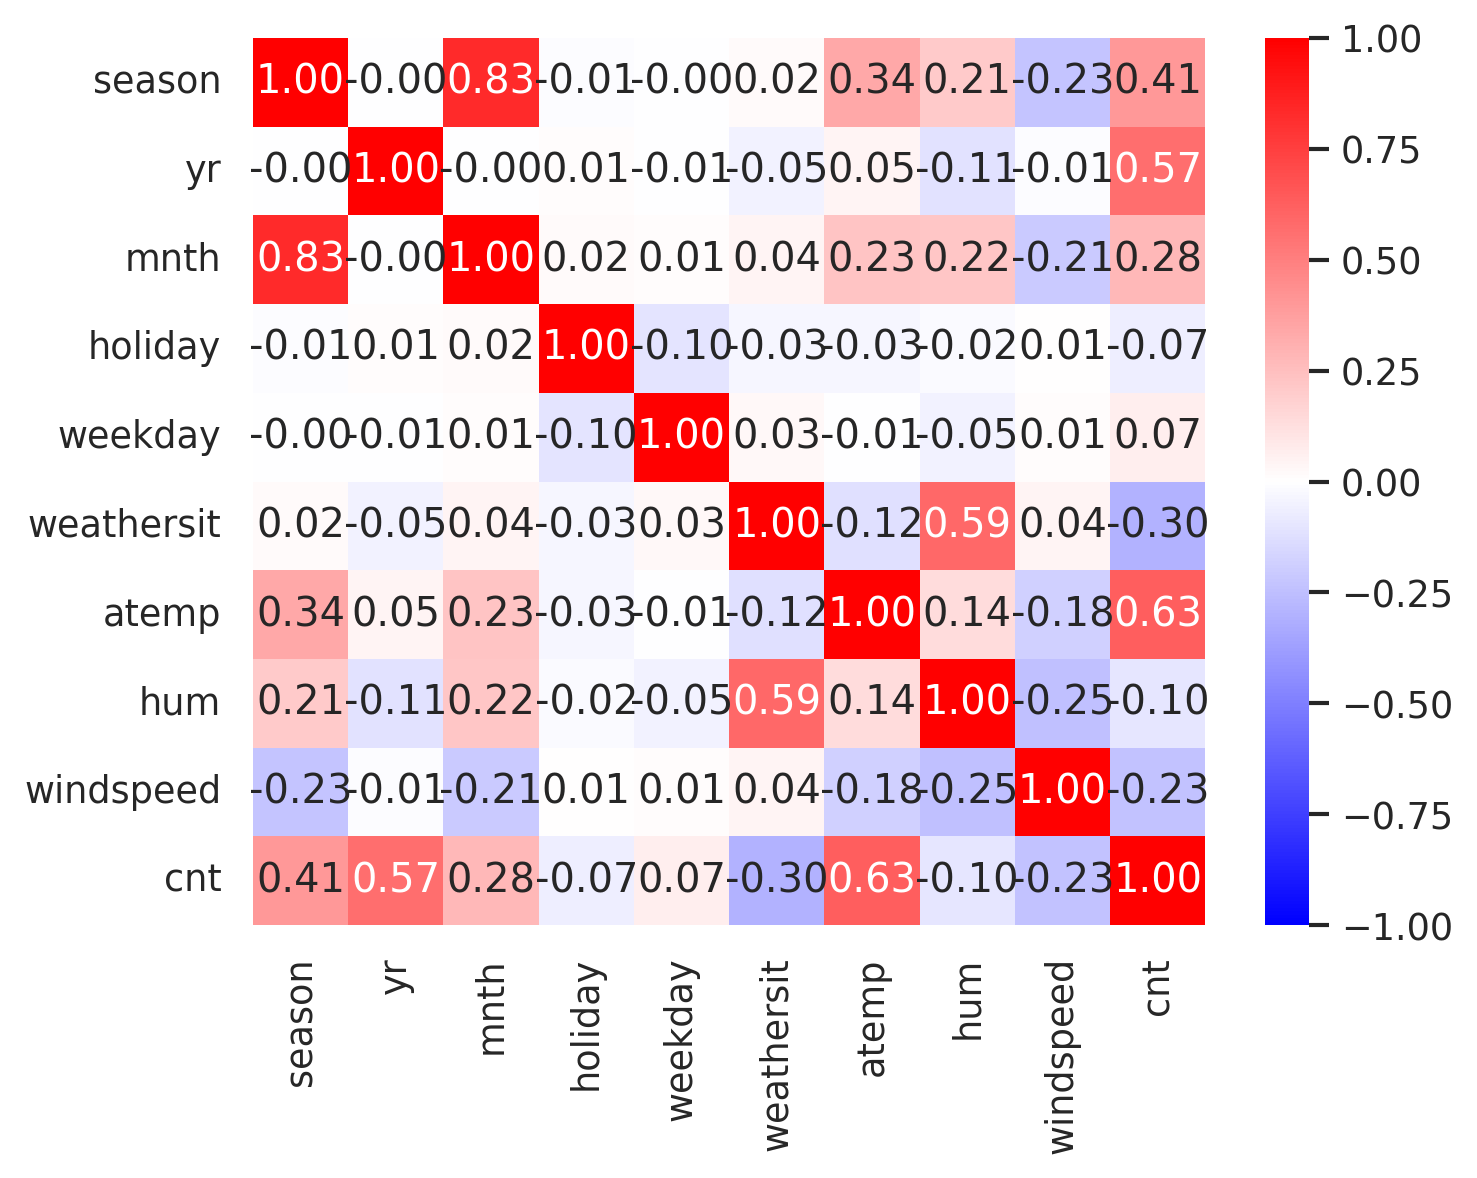

In [ ]:
#Computing a correlation coefficient matrix for most of the variables.
cols = ['season','yr','mnth','holiday','weekday','weathersit', 'atemp','hum','windspeed','cnt']
corr_matrix = np.corrcoef(day[cols],rowvar=False)

#Graphing the correlation coefficient matrix.
sns.set(color_codes=True)
sns.heatmap(corr_matrix,cmap='bwr',vmin=-1,vmax=1,annot=True,fmt='.2f',xticklabels=cols,yticklabels=cols)
plt.show()

###Individual Plots

In [ ]:
y=np.log(day['cnt'].values) #Setting y as the log of the bikes rented.
y2=np.log(hour['cnt'].values) #Setting y as the log of the bikes rented for the hour dataset.

####Time Based Factors

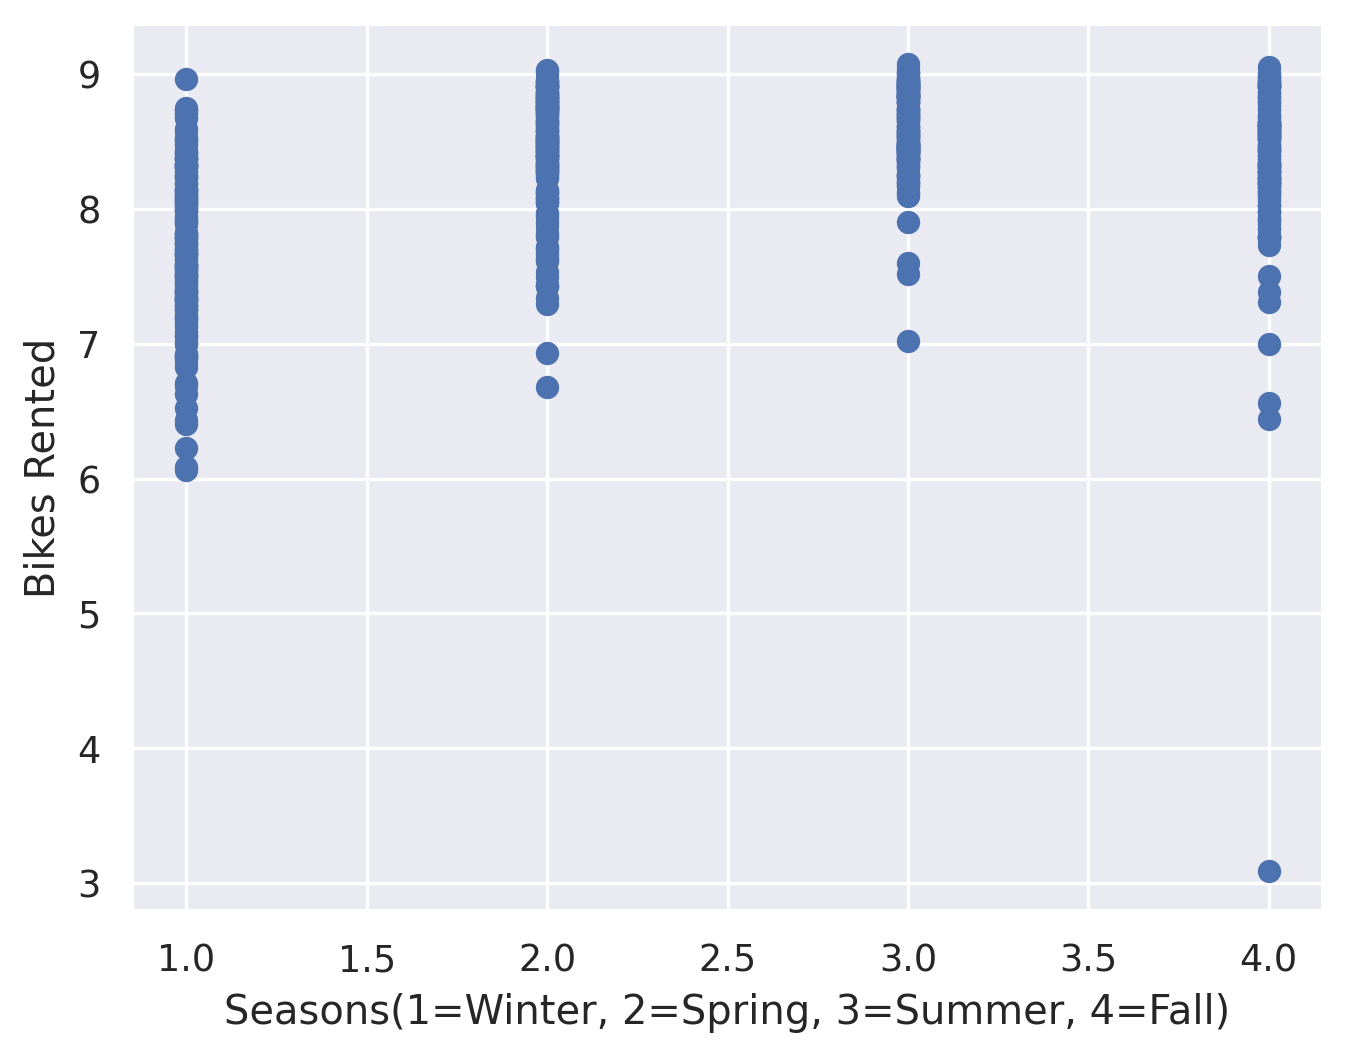

In [ ]:
#Graphing the relationship between the seasons and the bikes rented.
plt.scatter(day['season'].values, y)
plt.xlabel("Seasons(1=Winter, 2=Spring, 3=Summer, 4=Fall)")
plt.ylabel("Bikes Rented")
plt.show()

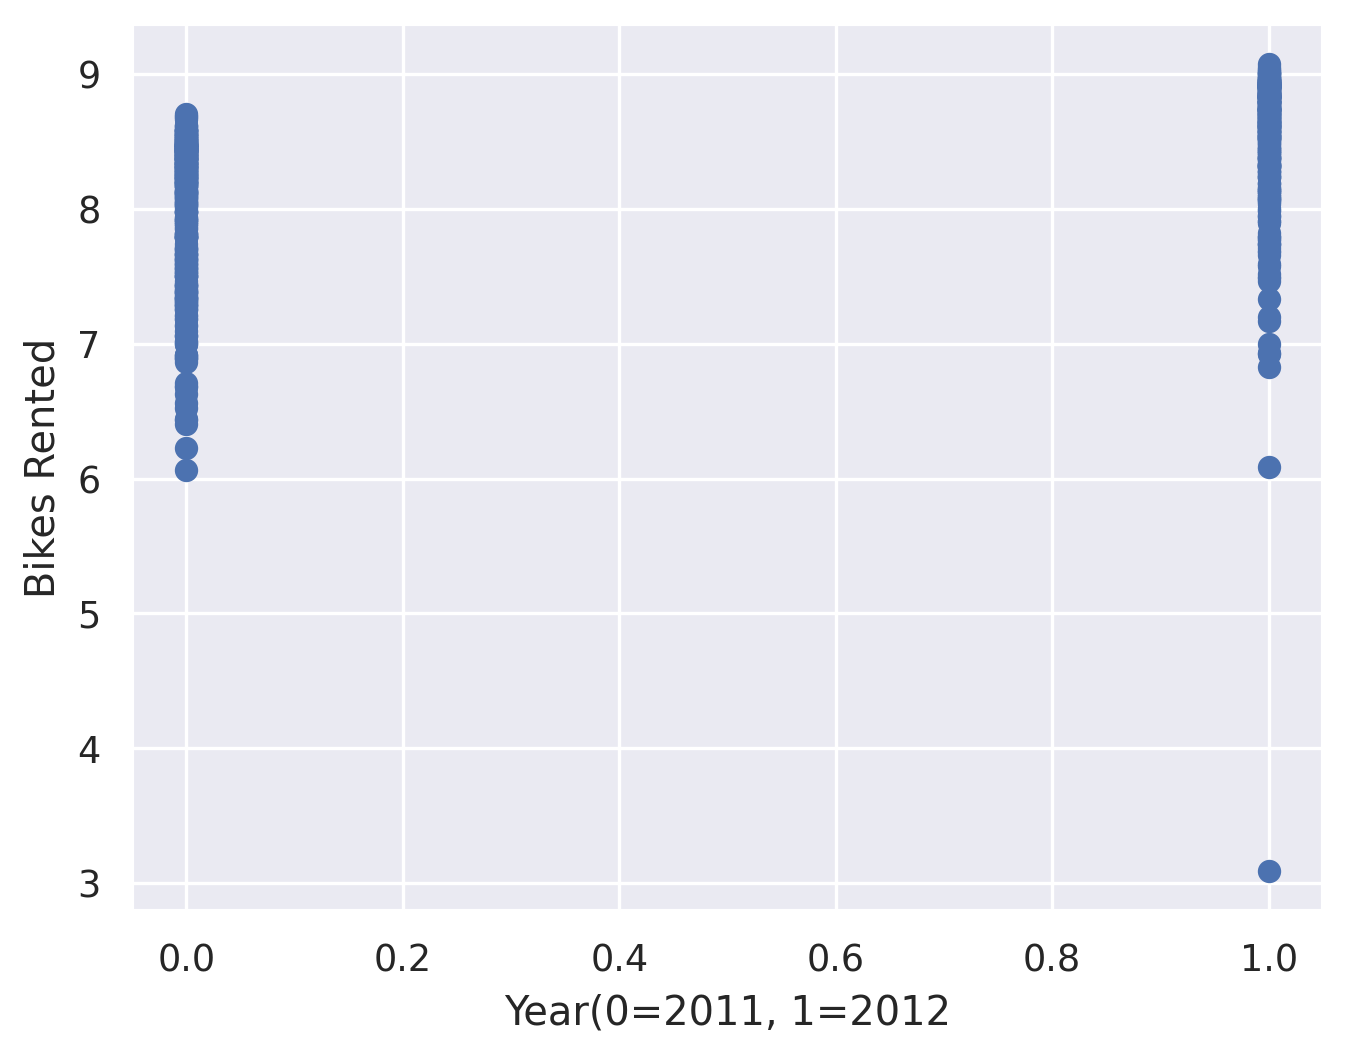

In [ ]:
#Graphing the relationships between the year and the number of bikes rented.
plt.scatter(day['yr'].values, y)
plt.xlabel("Year(0=2011, 1=2012")
plt.ylabel("Bikes Rented")
plt.show()

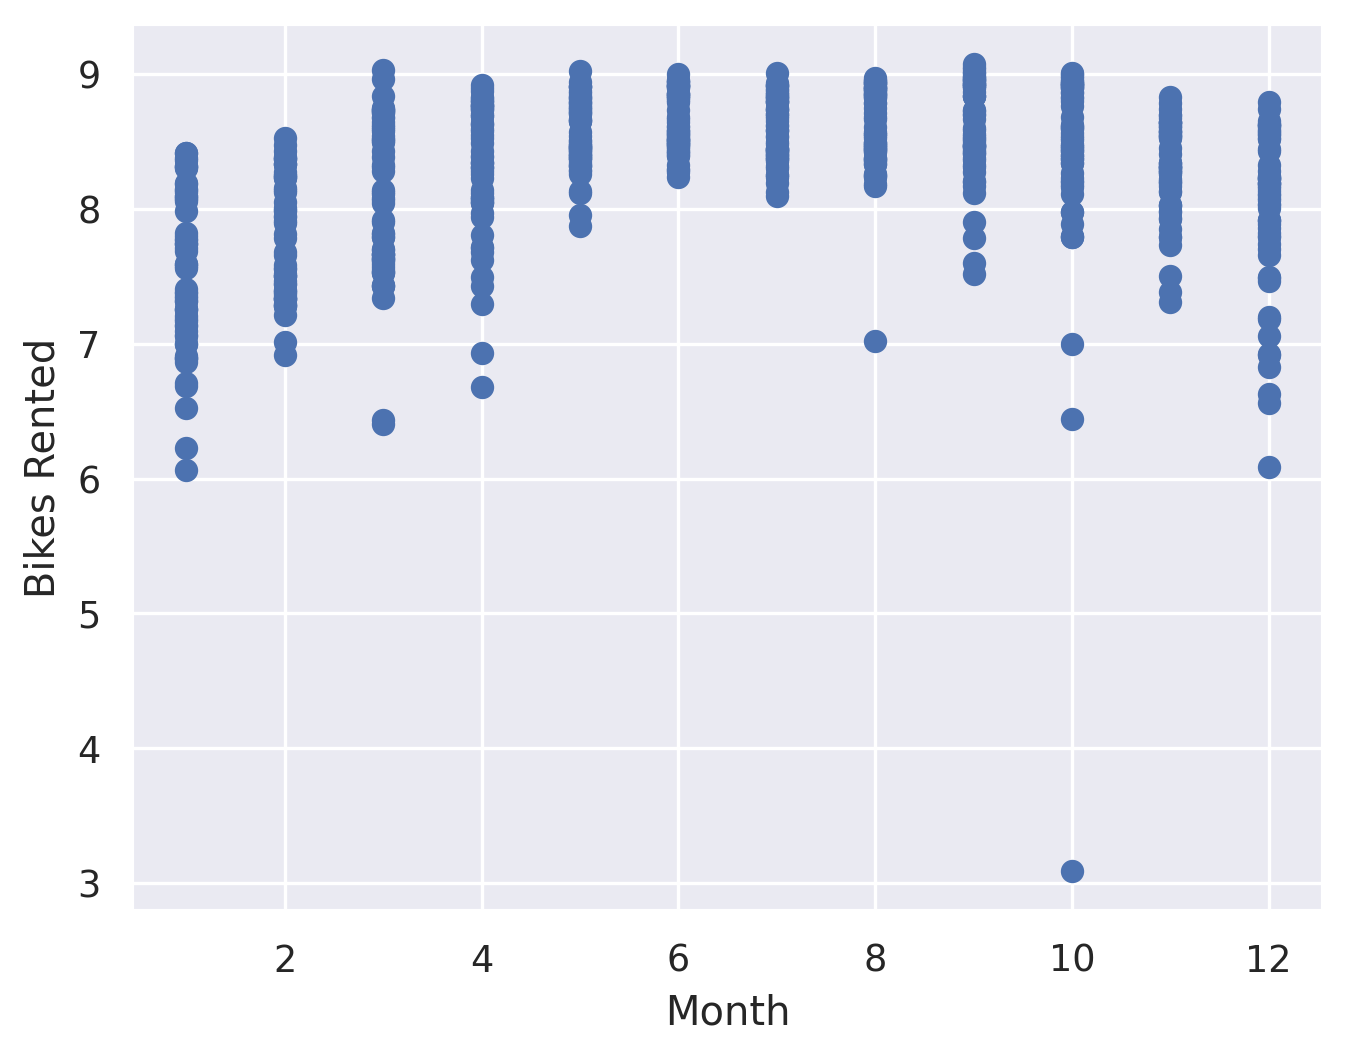

In [ ]:

#Graphing the relationship between the month and the number of bikes rented.
plt.scatter(day['mnth'].values, y)
plt.xlabel("Month")
plt.ylabel("Bikes Rented")
plt.show()

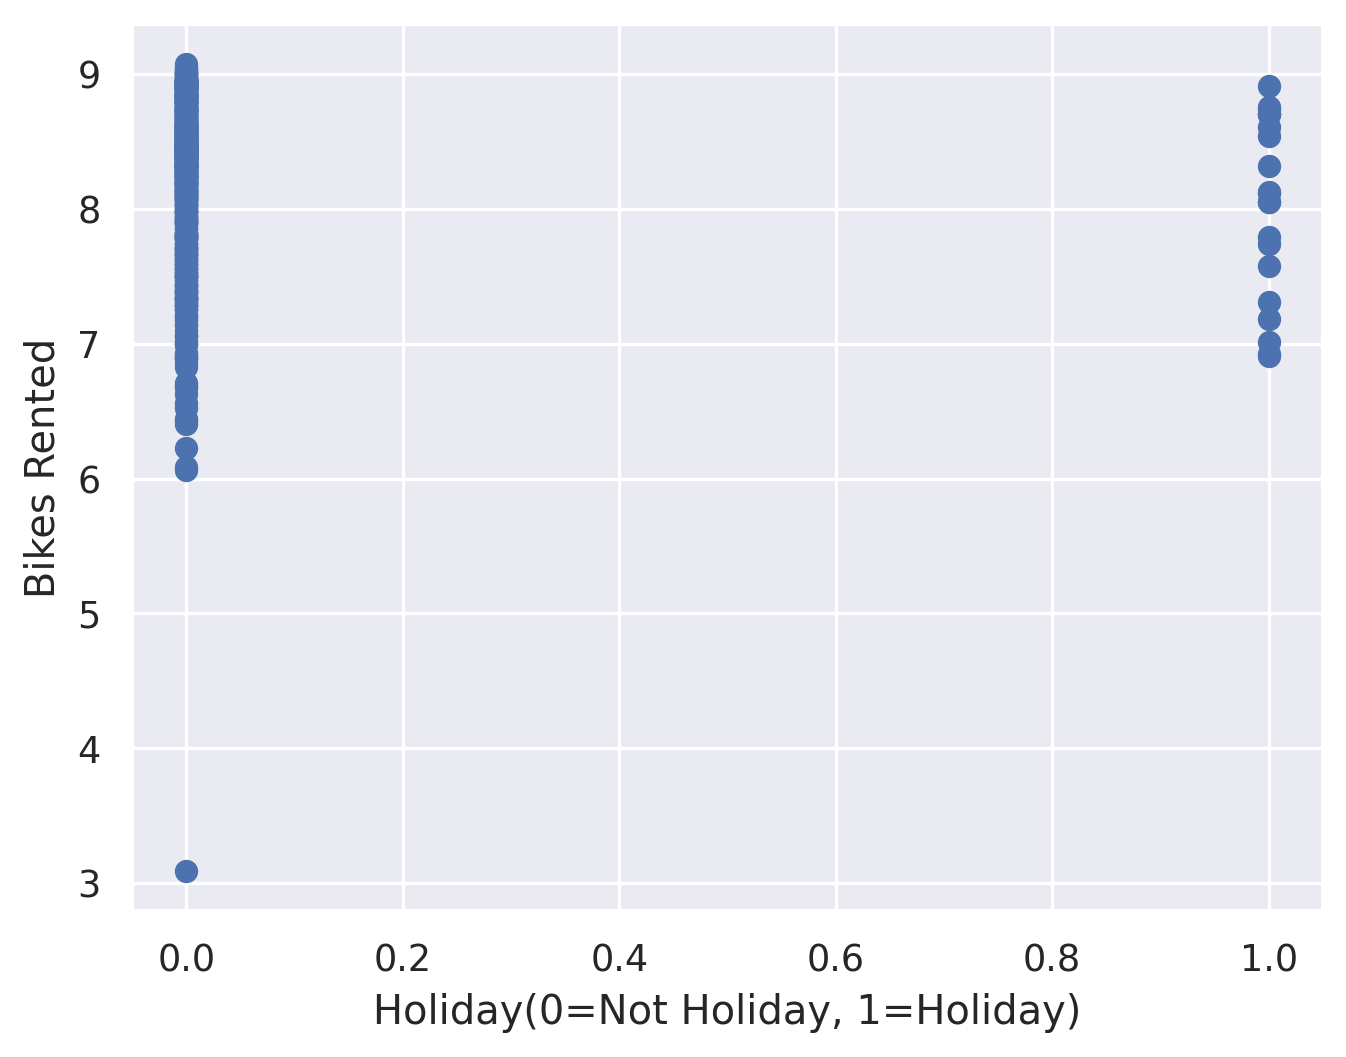

In [ ]:
#Graphing the relationship between holidays and bikes rented.
plt.scatter(day['holiday'].values, y)
plt.xlabel("Holiday(0=Not Holiday, 1=Holiday)")
plt.ylabel("Bikes Rented")
plt.show()

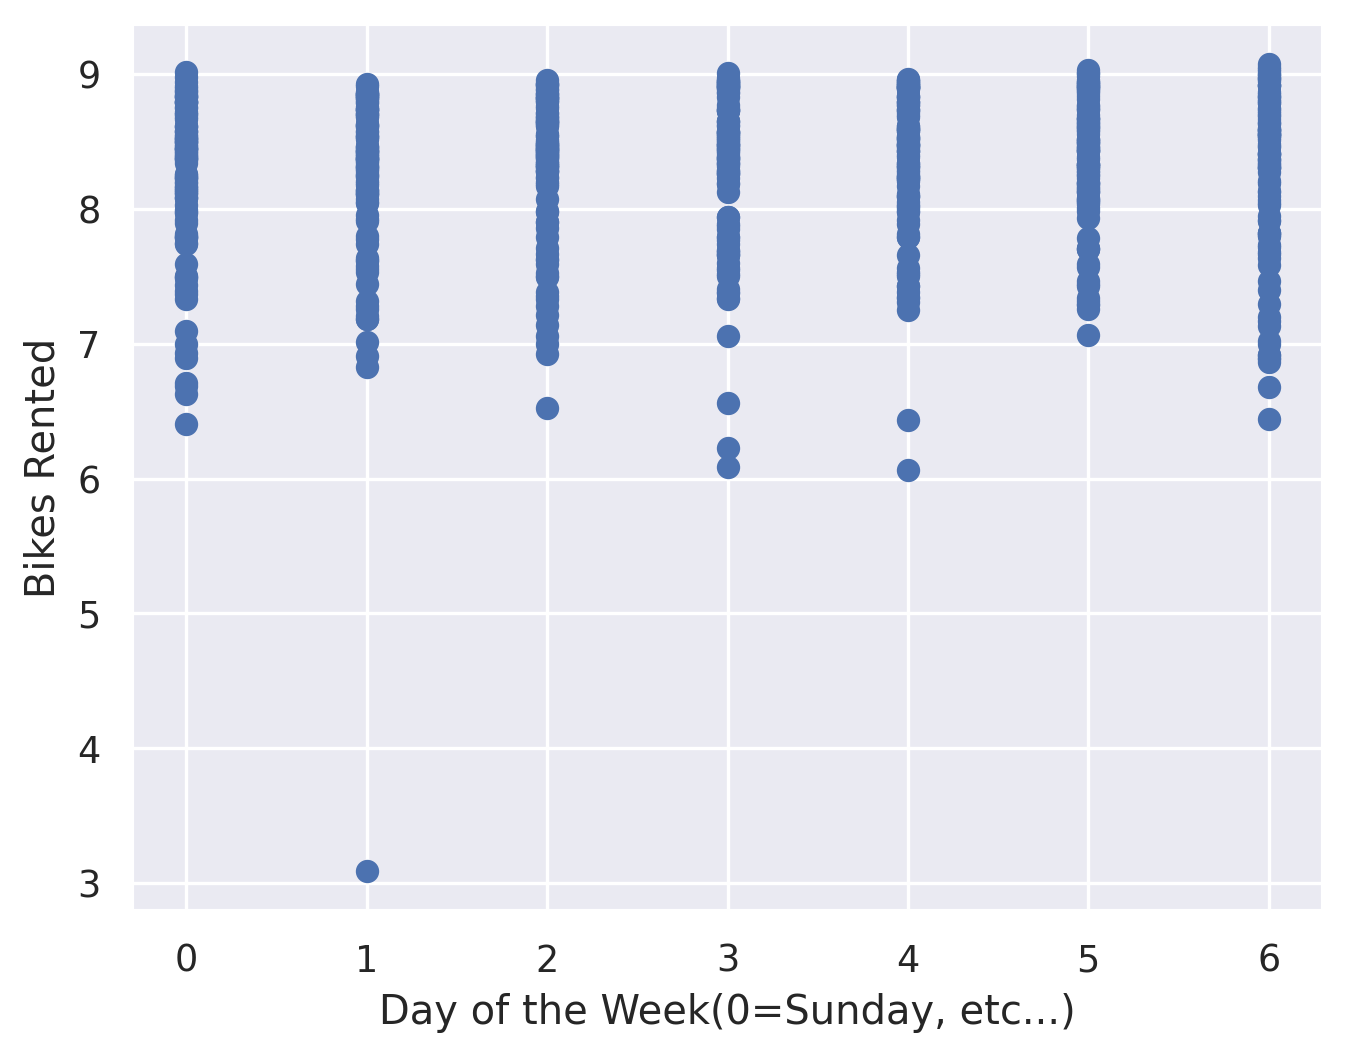

In [ ]:
#Graphing the relationship between the day of the week and the bikes rented.
plt.scatter(day['weekday'].values, y)
plt.xlabel("Day of the Week(0=Sunday, etc...)")
plt.ylabel("Bikes Rented")
plt.show()

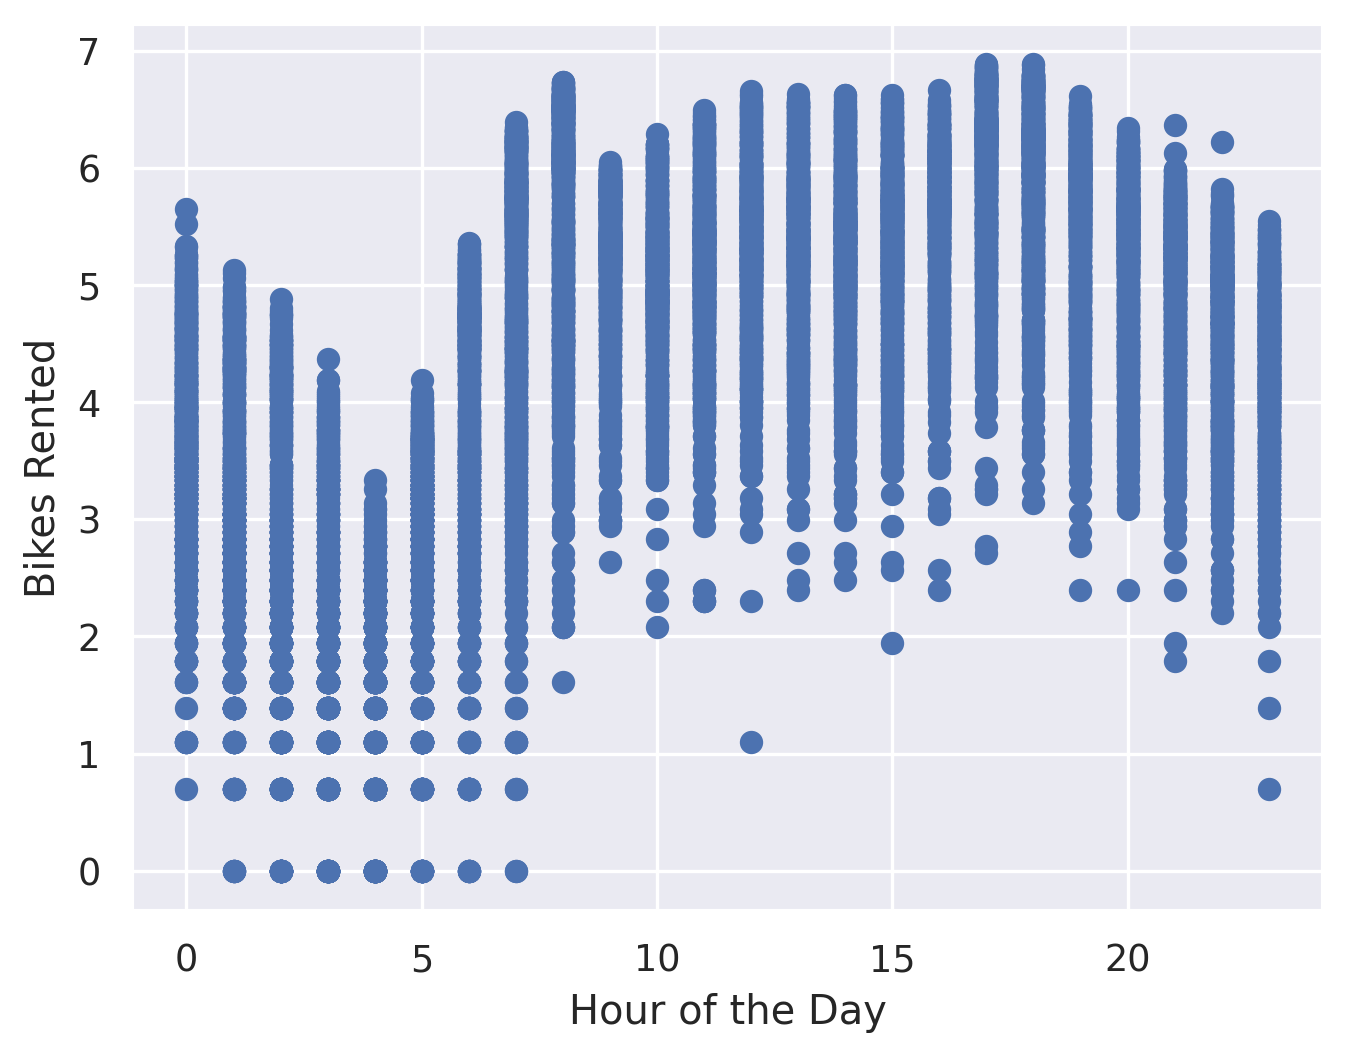

In [ ]:
#Graphing the relationship between the hour of the day and the number of bikes rented. Using the hour dataset for this graph.
plt.scatter(hour['hr'].values, y2)
plt.xlabel("Hour of the Day")
plt.ylabel("Bikes Rented")
plt.show()

####Atmospheric Conditions

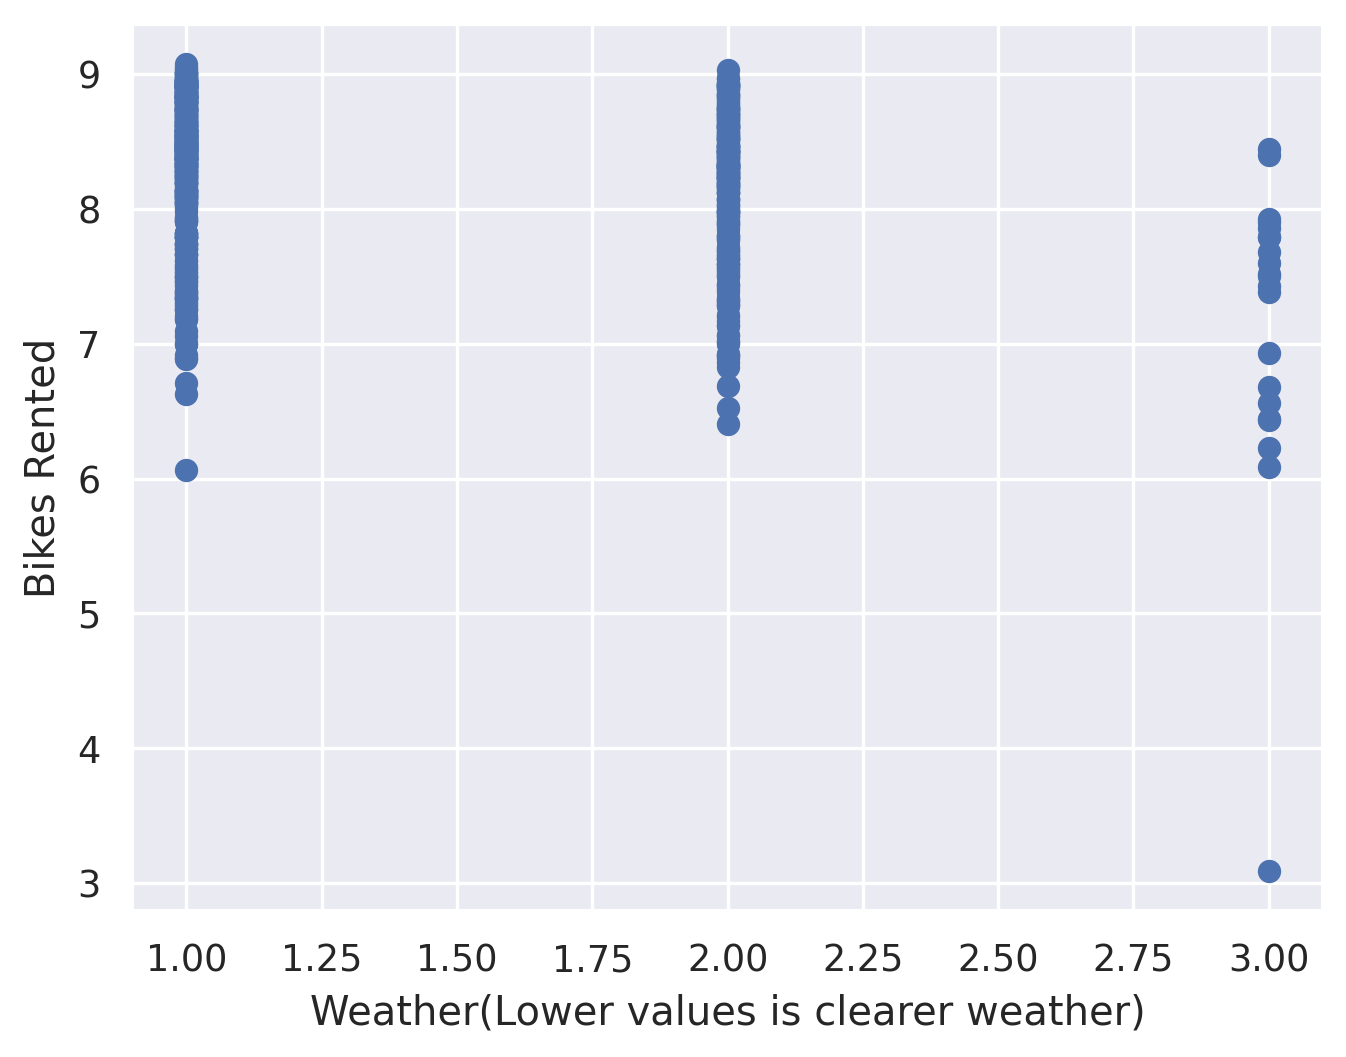

In [ ]:
#Relationship between the weather situation and bikes rented.
plt.scatter(day['weathersit'].values, y)
plt.xlabel("Weather(Lower values is clearer weather)")
plt.ylabel("Bikes Rented")
plt.show()

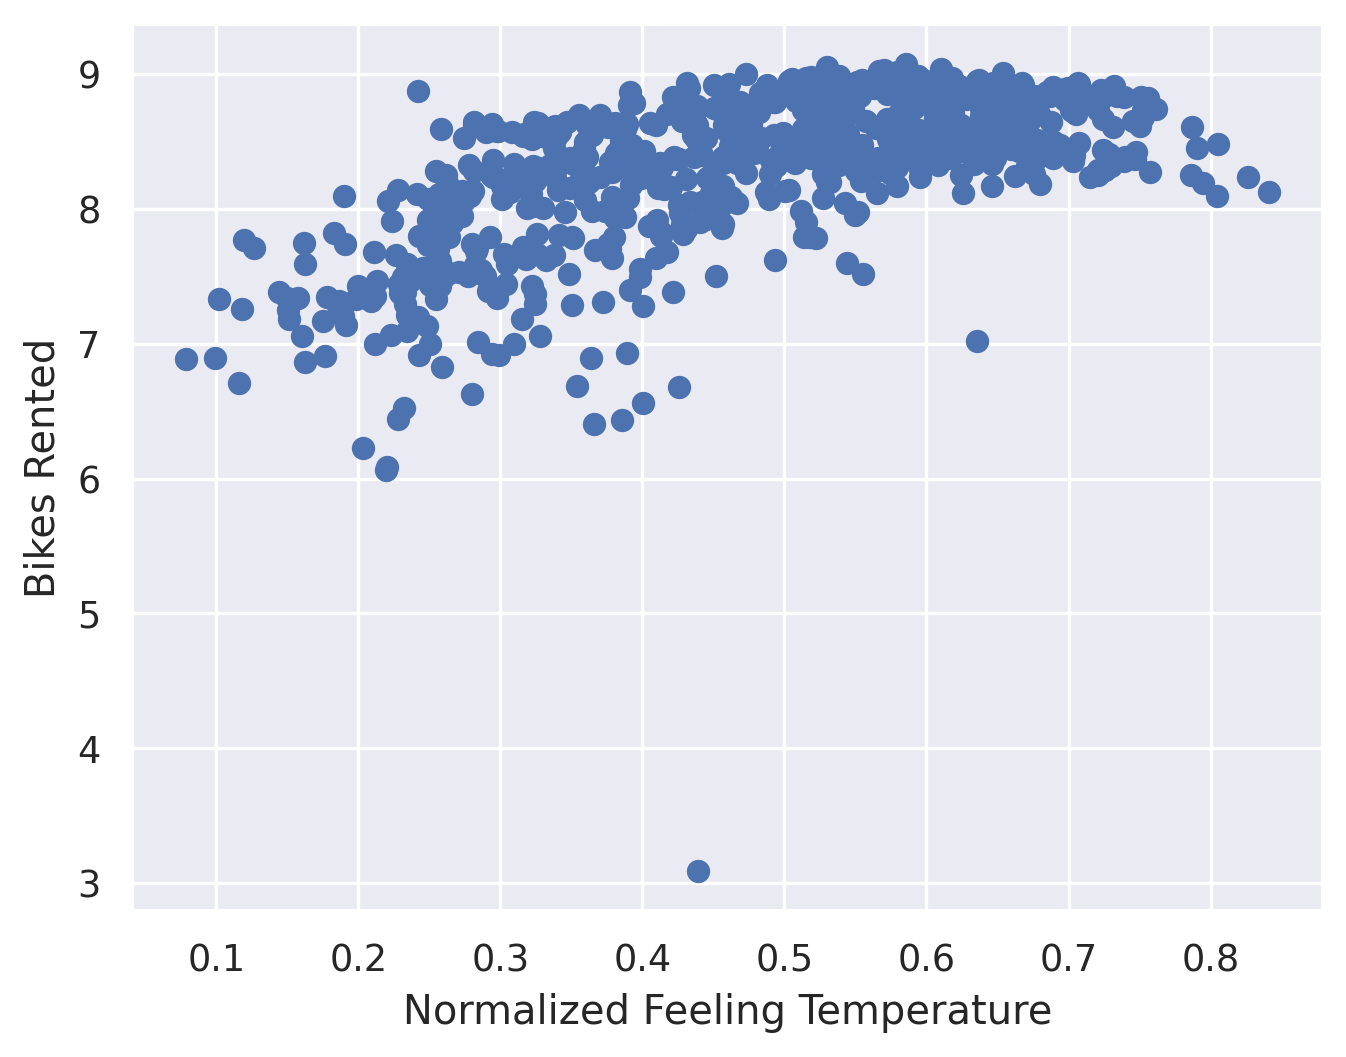

In [ ]:
#Relationship of the feeling temperature with the bikes rented.
plt.scatter(day['atemp'].values, y)
plt.xlabel("Normalized Feeling Temperature")
plt.ylabel("Bikes Rented")
plt.show()

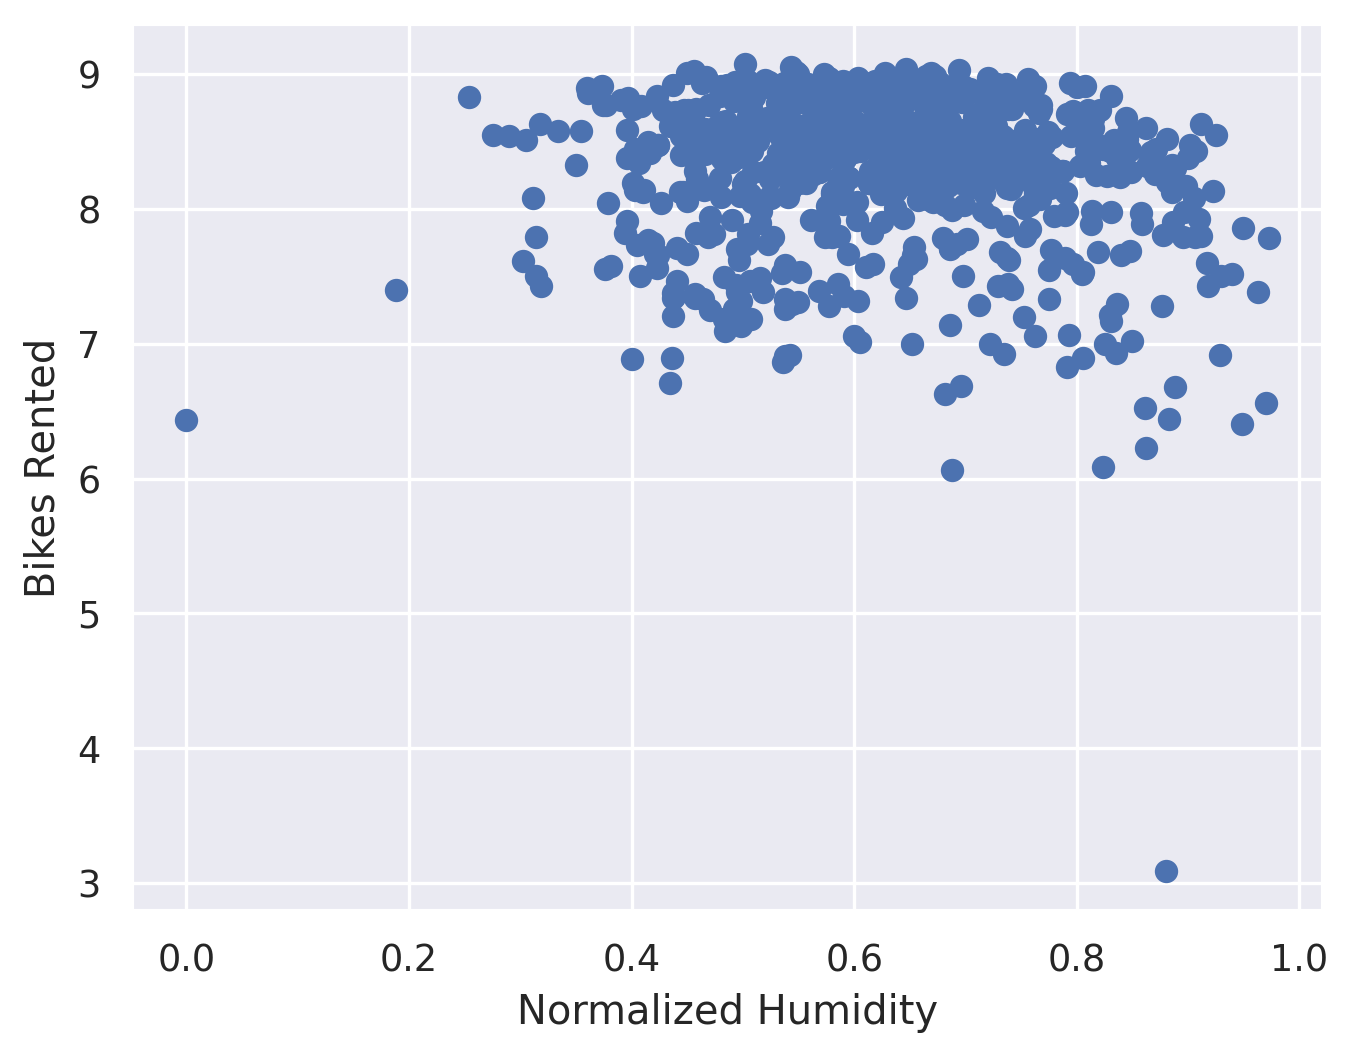

In [ ]:
#Relationship between humidity and bikes rented.
plt.scatter(day['hum'].values, y)
plt.xlabel("Normalized Humidity")
plt.ylabel("Bikes Rented")
plt.show()

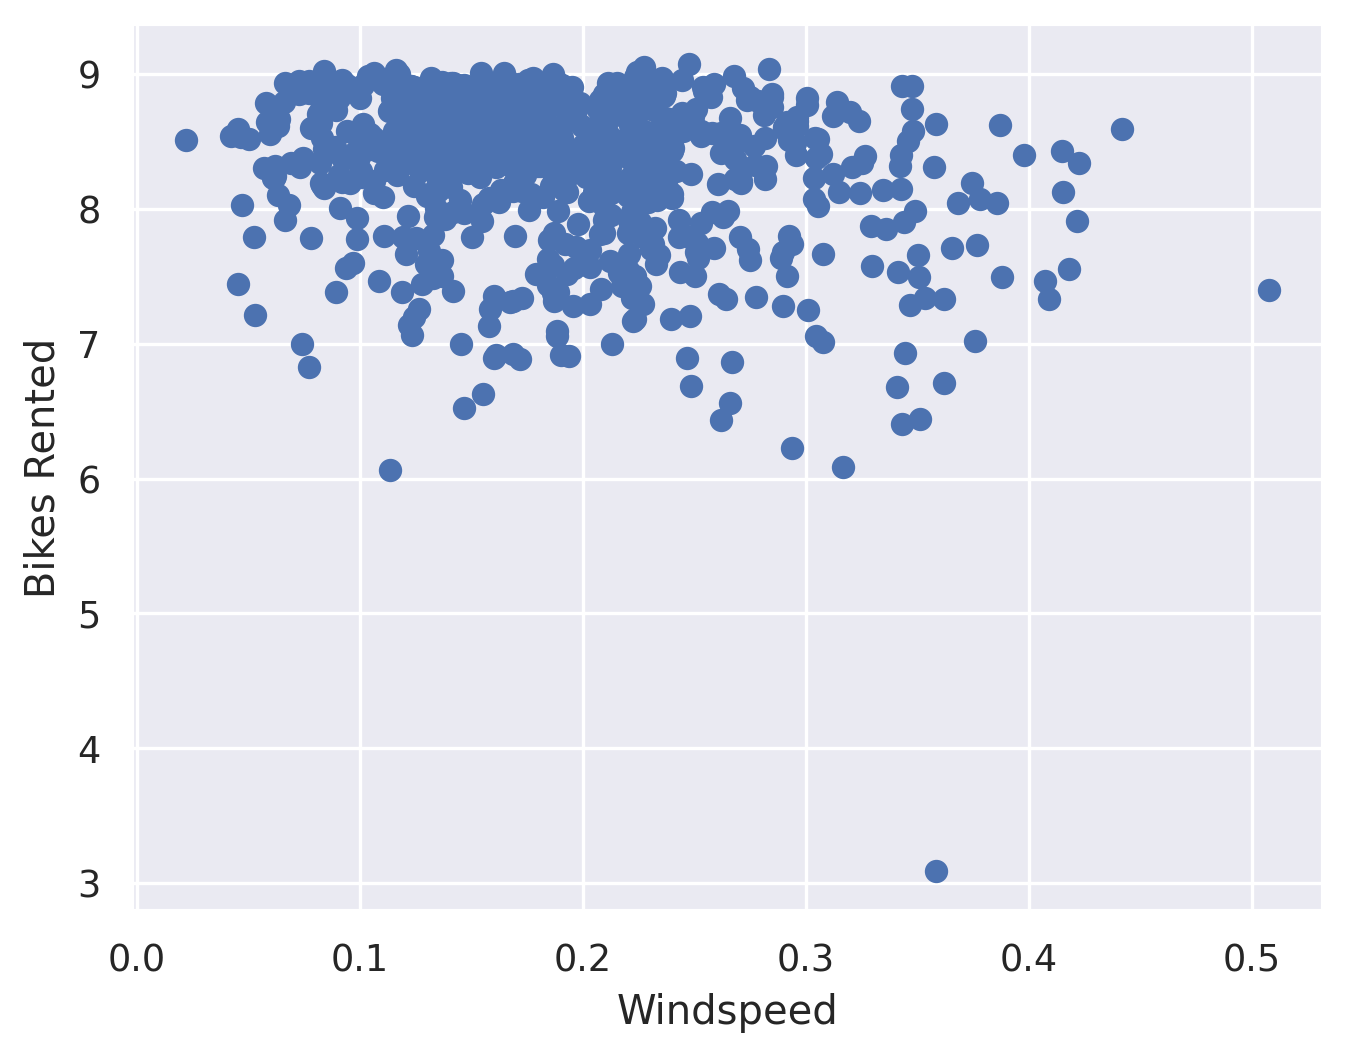

In [ ]:
#Relationship between windspeed and bikes rented.
plt.scatter(day['windspeed'].values, y)
plt.xlabel("Windspeed")
plt.ylabel("Bikes Rented")
plt.show()

###Averages for Categorical Variables

Some graphs for categorical variables have poor readability so I am finidng the averages and will graph those in a bar graph.

In [ ]:
#These lines of code are used to create arrays that holds the average bike rentals for each season.
arr_seasonx=[] #Empty dictionary to hold x information.
arr_seasony=[] #Empty dictionary to hold y information.
for i in day['season'].unique(): #Iterating through each season.
  idx_season=day['season']==i
  df_season=day[idx_season].reset_index(drop=True) #Create subset of datatable for each season.
  arr_seasonx.append(i) #Appending season and average bike rentals to array.
  arr_seasony.append(df_season['cnt'].sum()/(len(df_season)))

print(arr_seasonx)
print(arr_seasony)
arr_seasonx=['Winter','Spring','Summer','Fall'] #Setting x-array equal to names of seasons for graphing.

[1, 2, 3, 4]
[2604.1325966850827, 4992.33152173913, 5644.303191489362, 4728.162921348315]


In [ ]:
#These lines of code are used to create arrays that holds the average bike rentals for each year.
arr_yrx=[]
arr_yry=[]
for i in day['yr'].unique():
  idx_yr=day['yr']==i
  df_yr=day[idx_yr].reset_index(drop=True)
  arr_yrx.append(i)
  arr_yry.append(df_yr['cnt'].sum()/(len(df_yr)))

print(arr_yrx)
print(arr_yry)
arr_yrx=['2011','2012'] #Setting x-array equal to names of years for graphing.

[0, 1]
[3405.7616438356163, 5599.934426229508]


In [ ]:
#These lines of code are used to create arrays that holds the average bike rentals for each month.
arr_mnthx=[]
arr_mnthy=[]
for i in day['mnth'].unique():
  idx_mnth=day['mnth']==i
  df_mnth=day[idx_mnth].reset_index(drop=True)
  arr_mnthx.append(i)
  arr_mnthy.append(df_mnth['cnt'].sum()/(len(df_mnth)))

print(arr_mnthx)
print(arr_mnthy)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
[2176.3387096774195, 2655.2982456140353, 3692.2580645161293, 4484.9, 5349.774193548387, 5772.366666666667, 5563.677419354839, 5664.419354838709, 5766.516666666666, 5199.225806451613, 4247.183333333333, 3403.8064516129034]


In [ ]:
#These lines of code are used to create arrays that holds the average bike rentals for non-holidays versus holidays.
arr_holidayx=[]
arr_holidayy=[]
for i in day['holiday'].unique():
  idx_holiday=day['holiday']==i
  df_holiday=day[idx_holiday].reset_index(drop=True)
  arr_holidayx.append(i)
  arr_holidayy.append(df_holiday['cnt'].sum()/(len(df_holiday)))

print(arr_holidayx)
print(arr_holidayy)
arr_holidayx=['Non-Holiday','Holiday'] #Setting x-array equal to holiday status for graphing.

[0, 1]
[4527.104225352113, 3735.0]


In [ ]:
#These lines of code are used to create arrays that holds the average bike rentals for each weekday.
arr_weekdayx=[]
arr_weekdayy=[]
for i in day['weekday'].unique():
  idx_weekday=day['weekday']==i
  df_weekday=day[idx_weekday].reset_index(drop=True)
  arr_weekdayx.append(i)
  arr_weekdayy.append(df_weekday['cnt'].sum()/(len(df_weekday)))

print(arr_weekdayx)
print(arr_weekdayy)
arr_weekdayx=['Sun','Mon','Tues','Wed','Thurs','Fri','Sat'] #Setting the x array equal to the days of the work for graphing purposes.

[6, 0, 1, 2, 3, 4, 5]
[4550.542857142857, 4228.828571428571, 4338.1238095238095, 4510.663461538462, 4548.538461538462, 4667.259615384615, 4690.288461538462]


In [ ]:
#These lines of code are used to create arrays that holds the average bike rentals for each hour of the day.
arr_hrx=[]
arr_hry=[]
for i in hour['hr'].unique():
  idx_hr=hour['hr']==i
  df_hr=hour[idx_hr].reset_index(drop=True)
  arr_hrx.append(i)
  arr_hry.append(df_hr['cnt'].sum()/(len(df_hr)))

print(arr_hrx)
print(arr_hry)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
[53.89807162534435, 33.3756906077348, 22.86993006993007, 11.727403156384504, 6.352941176470588, 19.88981868898187, 76.04413793103448, 212.0646492434663, 359.01100412654745, 219.30949105914718, 173.6685006877579, 208.1430536451169, 253.31593406593407, 253.66117969821673, 240.94924554183814, 251.2331961591221, 311.9835616438356, 461.45205479452056, 425.510989010989, 311.52335164835165, 226.03021978021977, 172.31456043956044, 131.33516483516485, 87.83104395604396]


In [ ]:
#These lines of code are used to create arrays that holds the average bike rentals for each weather situation.
arr_weathersitx=[]
arr_weathersity=[]
for i in day['weathersit'].unique():
  idx_weathersit=day['weathersit']==i
  df_weathersit=day[idx_weathersit].reset_index(drop=True)
  arr_weathersitx.append(i)
  arr_weathersity.append(df_weathersit['cnt'].sum()/(len(df_weathersit)))

print(arr_weathersitx)
print(arr_weathersity)
arr_weathersitx=['Misty','Clear','Light Precipitation']

[2, 1, 3]
[4035.862348178138, 4876.7861771058315, 1803.2857142857142]
